# Knowledge Formal Modelling

This Jupyter Notebook was created to generate graphs representing formal models of the real world. These graphs were created for Professor Fausto Giunchiglia of the University of Trento, with the aim of exploring and visualising different formalisms for the representation of knowledge. Formal models are crucial tools for structuring, understanding and analysing information in a rigorous and systematic way. Through them, one can examine complex relationships between concepts, improve the clarity of knowledge structures and facilitate the learning process. Each section of the notebook focuses on a different formalism, illustrating how each method can be used to represent various aspects of knowledge accurately and effectively. The examples use university-related entities to show the application of the different formalisms.

In [1]:
# Install the Graphviz library in order to generate the graphs
%pip install graphviz

## WORDNET

In this section, graphs are generated using WordNet, a lexical database widely used in computational linguistics and natural language processing. WordNet organises concepts into sets of synonyms (synsets), linked by different types of semantic relations. This tool is fundamental for knowledge representation, as it allows us to explore the connections between words and concepts in a structured and intuitive way. Through the graphs generated in this section, one can visualise the intricate semantic networks that link linguistic terms, providing a clear view of the relationships that exist between different vocabulary elements. These graphs facilitate the understanding of lexical structures and can be used for various purposes, such as disambiguation of word meanings, machine translation and the development of artificial intelligence applications.

### Wordnet / IS-A Relationship

In this section, graphs represent IS-A relationships between concepts in WordNet. The IS-A relationship is a form of hierarchy where one concept is a subclass or instance of another. For example, 'dog' IS-A 'animal'. This type of relation is fundamental for structuring knowledge in a hierarchical and categorised manner.

In [2]:
"""
IS-A WORDNET
This script generates an IS-A hierarchical tree visualization of a WordNet example.
"""

# Importing the Graphviz library
import graphviz

def create_node(graph, node, parent=None):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
    """
    node_id = f"{node['name']}_{node['id']}"
    # Adding the node to the graph with a specific shape and style
    graph.node(node_id, f"{node['name']}\n{node['id']}", shape='box', style='rounded')
    if parent:
        # Creating an edge between the current node and the parent node
        graph.edge(node_id, parent, label="IS-A")
    # Recursively creating child nodes
    for child in node.get("children", []):
        create_node(graph, child, node_id)

def create_tree_visualization(trees):
    """
    Creates a tree visualization from the given trees.

    Args:
        trees (list): A list of trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment="WordNet Tree")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Creating the root node "entity" and the "contextual entity"
    root_id = "entity_01740"
    # dot.node(root_id, "contextual entity\n47321", shape='box', style='rounded')
    # dot.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
    # dot.edge("entity_01740", "contentity_01740", "IS-A")
    dot.node(root_id, "entity\n47321", shape='box', style='rounded')


    # Creating nodes for each tree and linking to the root
    for tree in trees:
        create_node(dot, tree[0], root_id)

    return dot

# Definition of IS-A trees
tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
            {
                "id": "46988",
                "name": "social event",
                "children": [
                    {
                        "id": "48370",
                        "name": "university event",
                        "children": [
                            {"id": "48450", "name": "graduation"},
                            {"id": "48472", "name": "lecture"},
                        ],
                    },
                ],
            },
            {
                "id": "47309",
                "name": "professional event",
                "children": [
                    {"id": "47358", "name": "conference"},
                    {"id": "47375", "name": "seminar"},
                ],
            },
        ],
    }
]

tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {
                "id": "09265",
                "name": "geographic area",
                "children": [
                    {
                        "id": "09526",
                        "name": "urban area",
                        "children": [
                            {
                                "id": "30127",
                                "name": "university",
                                "children": [
                                    {"id": "61098", "name": "classroom"},
                                    {"id": "24960", "name": "dormitory"},
                                    {"id": "58821", "name": "library"},
                                ],
                            },
                            {"id": "30582", "name": "downtown"},
                            {"id": "30145", "name": "business district"},
                        ],
                    },
                    {"id": "12912", "name": "facility"},
                ],
            },
        ],
    }
]

tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "08659",
                        "name": "professional",
                        "children": [
                            {
                                "id": "25323",
                                "name": "professor",
                                "children": [
                                    {"id": "28560", "name": "academic"},
                                    {"id": "08660", "name": "Ph.D."},
                                ],
                            },
                        ],
                    },
                    {
                        "id": "45356",
                        "name": "student",
                        "children": [
                            {"id": "56237", "name": "undergraduate"},
                            {"id": "65489", "name": "graduate"},
                        ],
                    },
                ],
            },
            {
                "id": "07698",
                "name": "child",
            },
        ],
    }
]

# Combine all trees
all_trees = [tree_event, tree_location, tree_person]

# Create the visualization
tree_viz = create_tree_visualization(all_trees)

# Save the visualization as a PDF file
tree_viz.render("wordnet_ISA", format="pdf", cleanup=True)
print("Tree visualization saved as 'wordnet_ISA.pdf'")

Tree visualization saved as 'wordnet_ISA.pdf'


### Wordnet / PART-OF Relationship

This section is dedicated to PART-OF relations in WordNet. The PART-OF relationship describes how one concept can be part of another. For example, 'wheel' PART-OF 'car'. This type of relation is essential for understanding the composition of objects and how parts interact with each other to form a whole.

In [3]:
"""
PART-OF WORDNET
This script generates a PART-OF hierarchical tree visualization of a WordNet example.
"""

# Importing the Graphviz library
import graphviz

def create_node(graph, node, parent=None):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
    """
    node_id = f"{node['name']}_{node['id']}"
    # Adding the node to the graph with a specific shape and style
    graph.node(node_id, f"{node['name']}\n{node['id']}", shape='rect', style='rounded')
    if parent:
        # Creating a dashed edge with a "PART-OF" relationship label
        graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")
    # Recursively creating child nodes if present
    for child in node.get("children", []):
        create_node(graph, child, node_id)

def create_part_of_tree_visualization(part_of_trees):
    """
    Creates a PART-OF tree visualization from the given trees.

    Args:
        part_of_trees (list): A list of PART-OF trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment='WordNet PART-OF Hierarchical Tree')
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Creating the root node for PART-OF trees
    part_of_root_id = "entitypartof_01740"
    dot.node(part_of_root_id, "entity\n01740", shape='rect', style='rounded')

    # Creating nodes for each tree and linking to the root
    for tree in part_of_trees:
        for subtree in tree:
            create_node(dot, subtree, part_of_root_id)

    return dot

# Definition of PART-OF trees
part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
    }
]

part_of_tree_urban = [
    {
        "id": "00200",
        "name": "urban",
    }
]

part_of_tree_location = [
    {
        "id": "20001",
        "name": "locations",
    }
]

part_of_tree_events = [
    {
        "id": "00500",
        "name": "events",
    }
]

part_of_tree_people = [
    {
        "id": "00600",
        "name": "people",
    }
]

# Combine all PART-OF trees
part_of_trees = [part_of_tree_education, part_of_tree_people, part_of_tree_events, part_of_tree_location, part_of_tree_urban]

# Create the visualization for PART-OF trees only
part_of_tree_viz = create_part_of_tree_visualization(part_of_trees)

# Save the visualization as a PDF file
part_of_tree_viz.render("wordnet_PARTOF", format="pdf", cleanup=True)
print("PART-OF tree visualization saved as 'wordnet_PARTOF.pdf'")

PART-OF tree visualization saved as 'wordnet_PARTOF.pdf'


### Wordnet / IS-A + PART-OF Relationships

Here, the IS-A and PART-OF relationship graphs are combined to provide a more complete and interconnected view of the concepts in WordNet. This combination helps to understand not only the hierarchy and categorisation, but also the compositional structure of the concepts.

In [4]:
"""
WORDNET ISA + PART-OF (EVENT + LOCATION + PERSON)
This script generates hierarchical tree visualizations of a WordNet example for both ISA and PART-OF relationships.
Here we have all three branches: EVENT + LOCATION + PERSON
"""

import graphviz

def create_node(graph, node, parent=None, relationship="ISA"):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
        relationship (str): The type of relationship for the edge ("ISA" or "PART-OF").
    """
    node_id = f"{node['name']}_{node['id']}"
    # Adding the node to the graph with a specific shape and style
    graph.node(node_id, f"{node['name']}\n{node['id']}", shape='rect', style='rounded')
    if parent:
        # Creating an edge based on the relationship type
        if relationship == "ISA":
            graph.edge(node_id, parent, label="IS-A")
        elif relationship == "PART-OF":
            graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")
    # Recursively creating child nodes if present
    for child in node.get("children", []):
        create_node(graph, child, node_id, relationship)

def create_tree_visualization(isa_trees, part_of_trees):
    """
    Creates a combined ISA and PART-OF tree visualization from the given trees.

    Args:
        isa_trees (list): A list of ISA trees, each represented as a list of dictionaries.
        part_of_trees (list): A list of PART-OF trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment='WordNet Hierarchical Trees')
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Create nodes for ISA trees
    root_id = "entityisa_01740"
    # dot.node(root_id, "contextual entity\n47321", shape='rect', style='rounded')
    dot.node(root_id, "entity\n47321", shape='rect', style='rounded')
    for tree in isa_trees:
        for subtree in tree:
            create_node(dot, subtree, root_id, "ISA")

    # Create nodes for PART-OF tree
    part_of_root_id = "entitypartof_01740"
    dot.node(part_of_root_id, "entity\n01740", shape='rect', style='rounded')
    for tree in part_of_trees:
        for subtree in tree:
            create_node(dot, subtree, part_of_root_id, "PART-OF")

    # dot.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
    # dot.edge("entityisa_01740", "contentity_01740", "IS-A")

    return dot

# Definition of PART-OF trees
part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
        "children": [
            {"id": "28560", "name": "academic"},
            {"id": "08660", "name": "Ph.D."},
        ],
    }
]

part_of_tree_events = [
    {
        "id": "00500",
        "name": "events",
        "children": [
            {"id": "48450", "name": "graduation"},
            {"id": "48472", "name": "lecture"},
            {"id": "47358", "name": "conference"},
            {"id": "47375", "name": "seminar"},
        ],
    }
]

part_of_tree_urban = [
    {
        "id": "00200",
        "name": "urban",
        "children": [
            {"id": "30582", "name": "downtown"},
        ],
    }
]

part_of_tree_location = [
    {
        "id": "20001",
        "name": "locations",
        "children": [
            {"id": "12912", "name": "facility"},
            {"id": "30145", "name": "business district"},
            {"id": "61098", "name": "classroom"},
            {"id": "24960", "name": "dormitory"},
            {"id": "58821", "name": "library"},
        ],
    }
]

part_of_tree_people = [
    {
        "id": "00600",
        "name": "people",
        "children": [
            {"id": "07698", "name": "child"},
            {"id": "56237", "name": "undergraduate"},
            {"id": "65489", "name": "graduate"},
        ],
    },
]

# Definition of ISA trees
tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
            {
                "id": "46988",
                "name": "social event",
                "children": [
                    {
                        "id": "48370",
                        "name": "university event",
                        "children": [
                            {"id": "48450", "name": "graduation"},
                            {"id": "48472", "name": "lecture"},
                        ],
                    },
                ],
            },
            {
                "id": "47309",
                "name": "professional event",
                "children": [
                    {"id": "47358", "name": "conference"},
                    {"id": "47375", "name": "seminar"},
                ],
            },
        ],
    }
]

tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {
                "id": "09265",
                "name": "geographic area",
                "children": [
                    {
                        "id": "09526",
                        "name": "urban area",
                        "children": [
                            {
                                "id": "30127",
                                "name": "university",
                                "children": [
                                    {"id": "61098", "name": "classroom"},
                                    {"id": "24960", "name": "dormitory"},
                                    {"id": "58821", "name": "library"},
                                ],
                            },
                            {"id": "30582", "name": "downtown"},
                            {"id": "30145", "name": "business district"},
                        ],
                    },
                    {"id": "12912", "name": "facility"},
                ],
            },
        ],
    }
]

tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "08659",
                        "name": "professional",
                        "children": [
                            {
                                "id": "25323",
                                "name": "professor",
                                "children": [
                                    {"id": "28560", "name": "academic"},
                                    {"id": "08660", "name": "Ph.D."},
                                ],
                            },
                        ],
                    },
                    {
                        "id": "45356",
                        "name": "student",
                        "children": [
                            {"id": "56237", "name": "undergraduate"},
                            {"id": "65489", "name": "graduate"},
                        ],
                    },
                ],
            },
            {
                "id": "07698",
                "name": "child",
            },
        ],
    }
]

# Combine all trees
isa_trees = [tree_event, tree_location, tree_person]
part_of_trees = [part_of_tree_events, part_of_tree_location, part_of_tree_urban, part_of_tree_education, part_of_tree_people]

# Create the visualization
tree_viz = create_tree_visualization(isa_trees, part_of_trees)

# Save the visualization as a PDF file
tree_viz.render("wordnet_ISA&PARTOF", format="pdf", cleanup=True)
print("Tree visualization saved as 'wordnet_ISA&PARTOF.pdf'")

Tree visualization saved as 'wordnet_ISA&PARTOF.pdf'


### Wordnet / IS-A + PART-OF Relationships (Event Branch Only)

Here we focus exclusively on the 'Event Branch' of the previous chart.

In [5]:
"""
WORDNET ISA + PART-OF (EVENT)
This script generates hierarchical tree visualizations of a WordNet example for both ISA and PART-OF relationships.
Here we focus on the EVENT branch.
"""

import graphviz

def create_node(graph, node, parent=None, relationship="ISA"):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
        relationship (str): The type of relationship for the edge ("ISA" or "PART-OF").
    """
    node_id = f"{node['name']}_{node['id']}"
    # Adding the node to the graph with a specific shape and style
    graph.node(node_id, f"{node['name']}\n{node['id']}", shape='rect', style='rounded')
    if parent:
        # Creating an edge based on the relationship type
        if relationship == "ISA":
            graph.edge(node_id, parent, label="IS-A")
        elif relationship == "PART-OF":
            graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")
    # Recursively creating child nodes if present
    for child in node.get("children", []):
        create_node(graph, child, node_id, relationship)

def create_tree_visualization(isa_trees, part_of_trees):
    """
    Creates a combined ISA and PART-OF tree visualization from the given trees.

    Args:
        isa_trees (list): A list of ISA trees, each represented as a list of dictionaries.
        part_of_trees (list): A list of PART-OF trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment='WordNet Hierarchical Trees')
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Create nodes for ISA trees
    root_id = "entityisa_01740"
    # dot.node(root_id, "contextual entity\n47321", shape='rect', style='rounded')
    dot.node(root_id, "entity\n47321", shape='rect', style='rounded')
    for tree in isa_trees:
        for subtree in tree:
            create_node(dot, subtree, root_id, "ISA")

    # Create nodes for PART-OF tree
    part_of_root_id = "entitypartof_01740"
    dot.node(part_of_root_id, "entity\n01740", shape='rect', style='rounded')
    for tree in part_of_trees:
        for subtree in tree:
            create_node(dot, subtree, part_of_root_id, "PART-OF")

    # dot.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
    # dot.edge("entityisa_01740", "contentity_01740", "IS-A")

    return dot

# Definizione dell'albero PART-OF
part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
        "children": [
            {"id": "48472", "name": "lecture"},
        ],
    }
]

part_of_tree_events = [
    {
        "id": "00500",
        "name": "events",
        "children": [
            {"id": "48450", "name": "graduation"},
            {"id": "47358", "name": "conference"},
            {"id": "47375", "name": "seminar"},
        ],
    }
]

# Definizione degli alberi IS-A
tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
            {
                "id": "46988",
                "name": "social event",
                "children": [
                    {
                        "id": "48370",
                        "name": "university event",
                        "children": [
                            {"id": "48450", "name": "graduation"},
                            {"id": "48472", "name": "lecture"},
                        ],
                    },
                ],
            },
            {
                "id": "47309",
                "name": "professional event",
                "children": [
                    {"id": "47358", "name": "conference"},
                    {"id": "47375", "name": "seminar"},
                ],
            },
        ],
    }
]

# Combine all trees
isa_trees = [tree_event]
part_of_trees = [part_of_tree_events, part_of_tree_education]

# Create the visualization
tree_viz = create_tree_visualization(isa_trees, part_of_trees)

# Save the visualization as a PDF file
tree_viz.render("wordnet_ISA&PARTOF_EVENT", format="pdf", cleanup=True)
print("Tree visualization saved as 'wordnet_ISA&PARTOF_EVENT.pdf'")

Tree visualization saved as 'wordnet_ISA&PARTOF_EVENT.pdf'


### Wordnet / IS-A + PART-OF Relationships (Location Branch Only)

Here we address the "Location Branch".

In [6]:
"""
WORDNET ISA + PART-OF (LOCATION)
This script generates hierarchical tree visualizations of a WordNet example for both ISA and PART-OF relationships.
Here we focus on the LOCATION branch.
"""

import graphviz

def create_node(graph, node, parent=None, relationship="ISA"):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
        relationship (str): The type of relationship for the edge ("ISA" or "PART-OF").
    """
    node_id = f"{node['name']}_{node['id']}"
    # Adding the node to the graph with a specific shape and style
    graph.node(node_id, f"{node['name']}\n{node['id']}", shape='rect', style='rounded')
    if parent:
        # Creating an edge based on the relationship type
        if relationship == "ISA":
            graph.edge(node_id, parent, label="IS-A")
        elif relationship == "PART-OF":
            graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")
    # Recursively creating child nodes if present
    for child in node.get("children", []):
        create_node(graph, child, node_id, relationship)

def create_tree_visualization(isa_trees, part_of_trees):
    """
    Creates a combined ISA and PART-OF tree visualization from the given trees.

    Args:
        isa_trees (list): A list of ISA trees, each represented as a list of dictionaries.
        part_of_trees (list): A list of PART-OF trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment='WordNet Hierarchical Trees')
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Create nodes for ISA trees
    root_id = "entityisa_01740"
    # dot.node(root_id, "contextual entity\n47321", shape='rect', style='rounded')
    dot.node(root_id, "entity\n47321", shape='rect', style='rounded')
    for tree in isa_trees:
        for subtree in tree:
            create_node(dot, subtree, root_id, "ISA")

    # Create nodes for PART-OF tree
    part_of_root_id = "entitypartof_01740"
    dot.node(part_of_root_id, "entity\n01740", shape='rect', style='rounded')
    for tree in part_of_trees:
        for subtree in tree:
            create_node(dot, subtree, part_of_root_id, "PART-OF")

    # dot.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
    # dot.edge("entityisa_01740", "contentity_01740", "IS-A")

    return dot

# Definizione dell'albero PART-OF
part_of_tree_urban = [
    {
        "id": "00200",
        "name": "urban",
        "children": [
            {"id": "30582", "name": "downtown"},
        ],
    }
]

part_of_tree_location = [
    {
        "id": "20001",
        "name": "locations",
        "children": [
            {"id": "12912", "name": "facility"},
            {"id": "30145", "name": "business district"},
            {"id": "61098", "name": "classroom"},
            {"id": "24960", "name": "dormitory"},
            {"id": "58821", "name": "library"},
        ],
    }
]

# Definizione degli alberi IS-A
tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {
                "id": "09265",
                "name": "geographic area",
                "children": [
                    {
                        "id": "09526",
                        "name": "urban area",
                        "children": [
                            {
                                "id": "30127",
                                "name": "university",
                                "children": [
                                    {"id": "61098", "name": "classroom"},
                                    {"id": "24960", "name": "dormitory"},
                                    {"id": "58821", "name": "library"},
                                ],
                            },
                            {"id": "30582", "name": "downtown"},
                            {"id": "30145", "name": "business district"},
                        ],
                    },
                    {"id": "12912", "name": "facility"},
                ],
            },
        ],
    }
]

# Combine all trees
isa_trees = [tree_location]
part_of_trees = [part_of_tree_location, part_of_tree_urban]

# Create the visualization
tree_viz = create_tree_visualization(isa_trees, part_of_trees)

# Save the visualization as a PDF file
tree_viz.render("wordnet_ISA&PARTOF_LOCATION", format="pdf", cleanup=True)
print("Tree visualization saved as 'wordnet_ISA&PARTOF_LOCATION.pdf'")

Tree visualization saved as 'wordnet_ISA&PARTOF_LOCATION.pdf'


### Wordnet / IS-A + PART-OF Relationships (Person Branch Only)

And finally we focus on the 'Person Branch'.

In [7]:
"""
WORDNET ISA + PART-OF (PERSON)
This script generates hierarchical tree visualizations of a WordNet example for both ISA and PART-OF relationships.
Here we focus on the PERSON branch.
"""

import graphviz

def create_node(graph, node, parent=None, relationship="ISA"):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
        relationship (str): The type of relationship for the edge ("ISA" or "PART-OF").
    """
    node_id = f"{node['name']}_{node['id']}"
    # Adding the node to the graph with a specific shape and style
    graph.node(node_id, f"{node['name']}\n{node['id']}", shape='rect', style='rounded')
    if parent:
        # Creating an edge based on the relationship type
        if relationship == "ISA":
            graph.edge(node_id, parent, label="IS-A")
        elif relationship == "PART-OF":
            graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")
    # Recursively creating child nodes if present
    for child in node.get("children", []):
        create_node(graph, child, node_id, relationship)

def create_tree_visualization(isa_trees, part_of_trees):
    """
    Creates a combined ISA and PART-OF tree visualization from the given trees.

    Args:
        isa_trees (list): A list of ISA trees, each represented as a list of dictionaries.
        part_of_trees (list): A list of PART-OF trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment='WordNet Hierarchical Trees')
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Create nodes for ISA trees
    root_id = "entityisa_01740"
    # dot.node(root_id, "contextual entity\n47321", shape='rect', style='rounded')
    dot.node(root_id, "entity\n47321", shape='rect', style='rounded')
    for tree in isa_trees:
        for subtree in tree:
            create_node(dot, subtree, root_id, "ISA")

    # Create nodes for PART-OF tree
    part_of_root_id = "entitypartof_01740"
    dot.node(part_of_root_id, "entity\n01740", shape='rect', style='rounded')
    for tree in part_of_trees:
        for subtree in tree:
            create_node(dot, subtree, part_of_root_id, "PART-OF")

    # dot.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
    # dot.edge("entityisa_01740", "contentity_01740", "IS-A")

    return dot

# Definizione dell'albero PART-OF
part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
        "children": [
            {"id": "28560", "name": "academic"},
            {"id": "08660", "name": "Ph.D."},
        ],
    }
]

part_of_tree_people = [
    {
        "id": "00600",
        "name": "people",
        "children": [
            {"id": "07698", "name": "child"},
            {"id": "56237", "name": "undergraduate"},
            {"id": "65489", "name": "graduate"},
        ],
    },
]

# Definizione degli alberi IS-A
tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "08659",
                        "name": "professional",
                        "children": [
                            {
                                "id": "25323",
                                "name": "professor",
                                "children": [
                                    {"id": "28560", "name": "academic"},
                                    {"id": "08660", "name": "Ph.D."},
                                ],
                            },
                        ],
                    },
                    {
                        "id": "45356",
                        "name": "student",
                        "children": [
                            {"id": "56237", "name": "undergraduate"},
                            {"id": "65489", "name": "graduate"},
                        ],
                    },
                ],
            },
            {
                "id": "07698",
                "name": "child",
            },
        ],
    }
]

# Combine all trees
isa_trees = [tree_person]
part_of_trees = [part_of_tree_people, part_of_tree_education]

# Create the visualization
tree_viz = create_tree_visualization(isa_trees, part_of_trees)

# Save the visualization as a PDF file
tree_viz.render("wordnet_ISA&PARTOF_PERSON", format="pdf", cleanup=True)
print("Tree visualization saved as 'wordnet_ISA&PARTOF_PERSON.pdf'")

Tree visualization saved as 'wordnet_ISA&PARTOF_PERSON.pdf'


## UKC (Universal Knowledge Core)

In this section, graphics are generated using the Universal Knowledge Core (UKC), a high-quality, large-scale, machine-readable, diversity-aware, multilingual lexical resource. The fundamental design principle of the UKC is to maintain a clear distinction between the languages used to describe the world as perceived and what is described, i.e. the world itself.

The Concept Core (CC) represents the world within the UKC and consists of a semantic network in which the nodes are language-independent concepts. Each concept has a unique identifier that distinguishes it from any other concept. The semantic network consists of a series of semantic relations between nodes that link the meanings of concepts, where these relations are an extension of those used by the Princeton WordNet (PWN) (e.g. hyponym, meronym).

The Language Core (LC) is the component of the UKC that stores words, senses, synsets, glosses and examples for all languages supported by the UKC. In each LC, each sinset is uniquely associated with a language and, within that language, with at least one word. The synsets are linked to concepts, with the constraint that each synset is linked to only one concept.

Each graph generated will have the UKC in the centre, with the English language on the right and the Italian language on the left. This approach shows how concepts are unified and linked across different languages, facilitating a more complete and integrated understanding of lexical relationships.

### UKC / IS-A Relationship

In this section, graphs represent IS-A relationships within the UKC, similar to what was seen in the WordNet section. The IS-A relationship creates a hierarchy where one concept is a subclass or instance of another, providing a clear and categorised structure of knowledge.

In [8]:
# UKC ISA

# Definizione degli alberi IS-A
tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
            {
                "id": "46988",
                "name": "social event",
                "children": [
                    {
                        "id": "48370",
                        "name": "university event",
                        "children": [
                            {"id": "48450", "name": "graduation"},
                            {"id": "48472", "name": "lecture"},
                        ],
                    },
                ],
            },
            {
                "id": "47309",
                "name": "professional event",
                "children": [
                    {"id": "47358", "name": "conference"},
                    {"id": "47375", "name": "seminar"},
                ],
            },

        ],
    }
]

tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {
                "id": "09265",
                "name": "geographic area",
                "children": [
                    {
                        "id": "09526",
                        "name": "urban area",
                        "children": [
                            {
                                "id": "30127",
                                "name": "university",
                                "children": [
                                    {"id": "61098", "name": "classroom"},
                                    {"id": "24960", "name": "dormitory"},
                                    {"id": "58821", "name": "library"},
                                ],
                            },
                            {"id": "30582", "name": "downtown"},
                            {"id": "30145", "name": "business district"},
                        ],
                    },
                    {"id": "12912", "name": "facility"},
                ],
            },
        ],
    }
]

tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "08659",
                        "name": "professional",
                        "children": [
                            {
                                "id": "25323",
                                "name": "professor",
                                "children": [
                                    {"id": "28560", "name": "academic"},
                                    {"id": "08660", "name": "Ph.D."},
                                ],
                            },
                        ],
                    },
                    {
                        "id": "45356",
                        "name": "student",
                        "children": [
                            {"id": "56237", "name": "undergraduate"},
                            {"id": "65489", "name": "graduate"},
                        ],
                    },
                ],
            },
            {
                "id": "07698",
                "name": "child",
            },
        ],
    }
]

import random

def generate_random_digit_string():
  """Generates a random 5-digit string.

  Returns:
    A string containing the 5 random digits.
  """
  random_digits = []
  for _ in range(5):
    random_digit = random.randint(0, 9)
    random_digits.append(str(random_digit))
  random_digit_string = "".join(random_digits)
  return random_digit_string

import graphviz

def translate_to_italian(name):
    translations = {
        "entity": "entità",
        "event": "evento",
        "social event": "evento sociale",
        "private event": "evento privato",
        "university event": "evento universitario",
        "graduation": "laurea",
        "university lecture": "lezione universitaria",
        "professional event": "evento professionale",
        "conference": "conferenza",
        "seminar": "seminario",
        "workshop": "workshop",
        "location": "luogo",
        "geographic area": "area geografica",
        "urban area": "area urbana",
        "university": "università",
        "classroom": "aula",
        "dormitory": "dormitorio",
        "library": "biblioteca",
        "downtown": "centro città",
        "business district": "quartiere degli affari",
        "facility": "struttura",
        "person": "persona",
        "adult": "adulto",
        "professional": "professionista",
        "lawyer": "avvocato",
        "professor": "professore",
        "academic": "accademico",
        "Ph.D.": "dottore di ricerca",
        "student": "studente",
        "undergraduate student": "studente universitario",
        "graduate student": "studente laureato",
        "child": "bambino"
    }
    return translations.get(name, name)

def create_node(graph, node, parent=None, is_translated=False, language=None):
    prefix = ""
    node_label = ""
    if is_translated:
        if language == "italian":
            prefix = "it"
            node_name = translate_to_italian(node['name'])
            node_id = f"it{node['id']}"
            node_id_label = generate_random_digit_string()
            node_label = f"{node_name}\n{prefix}{node_id_label}"
        elif language == "ukc":
            node_name = generate_random_digit_string()
            node_id = f"ukc_{node['id']}"
            node_label = f"{node_name}"
        else:
            node_id = f"{prefix}{node['id']}"
            node_label = f"{node_name}\n{node_id}"
    else:
        prefix = "en"
        node_id = f"{node['id']}"
        node_name = node['name']
        node_label = f"{node_name}\n{prefix}{node_id}"

    if language != "ukc":
        graph.node(node_id, node_label, shape='box', style='rounded')
    else:
        graph.node(node_id, node_label, shape='box', style='rounded')

    if parent:
        graph.edge(node_id, parent, label="IS-A")

    if "children" in node:
        for child in node["children"]:
            create_node(graph, child, node_id, is_translated, language)

def create_tree_visualization(trees):
    dot = graphviz.Digraph(comment="UKC Tree")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    with dot.subgraph(name="cluster_0") as c:
        c.attr(label="English")
        root_id = "01740"
        c.node(root_id, "entity\nen47321", shape='box', style='rounded')
        # c.node(root_id, "contextual entity\nen47321", shape='box', style='rounded')

        # c.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
        # c.edge("01740", "contentity_01740", "IS-A")

        for tree in trees:
            create_node(c, tree[0], root_id)


    with dot.subgraph(name="cluster_1") as c:
        c.attr(label="UKC")
        root_id = "ukc_01740"
        c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')

        # c.node("contentity_ukc_01740", generate_random_digit_string(), shape='box', style='rounded')
        # c.edge("ukc_01740", "contentity_ukc_01740", "IS-A")

        for tree in trees:
            create_node(c, tree[0], root_id, is_translated=True, language="ukc")

    with dot.subgraph(name="cluster_2") as c:
        c.attr(label="Italiano")
        root_id = "it01740"
        c.node(root_id, "entità\nit70650", shape='box', style='rounded')
        # c.node(root_id, "entità contestuale\nit70650", shape='box', style='rounded')

        # c.node("contentity_it_01740", "entità\n49817", shape='box', style='rounded')
        # c.edge("it01740", "contentity_it_01740", "IS-A")

        for tree in trees:
            create_node(c, tree[0], root_id, is_translated=True, language="italian")

    # edges from ukc
    # dot.edge("contentity_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    # dot.edge("contentity_it_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("46988", "ukc_46988", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it46988", "ukc_46988", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("47309", "ukc_47309", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it47309", "ukc_47309", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("47358", "ukc_47358", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it47358", "ukc_47358", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("47375", "ukc_47375", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it47375", "ukc_47375", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("09265", "ukc_09265", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it09265", "ukc_09265", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("61098", "ukc_61098", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it61098", "ukc_61098", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("24960", "ukc_24960", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it24960", "ukc_24960", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("58821", "ukc_58821", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it58821", "ukc_58821", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30582", "ukc_30582", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30582", "ukc_30582", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30145", "ukc_30145", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30145", "ukc_30145", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("12912", "ukc_12912", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it12912", "ukc_12912", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("08659", "ukc_08659", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it08659", "ukc_08659", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("28560", "ukc_28560", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it28560", "ukc_28560", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("56237", "ukc_56237", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it56237", "ukc_56237", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("65489", "ukc_65489", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it65489", "ukc_65489", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("07698", "ukc_07698", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it07698", "ukc_07698", label="", style='dotted', color="#70727B", dir="back")

    return dot


# Combine all trees
all_trees = [tree_event, tree_location, tree_person]

# Create the visualization
tree_viz = create_tree_visualization(all_trees)

# Save the visualization as a PDF file
tree_viz.render("UKC_ISA", format="pdf", cleanup=True)
print("Tree visualization saved as 'UKC_ISA.pdf'")

Tree visualization saved as 'UKC_ISA.pdf'


### UKC / IS-A Relationship (Reduced Version)

This section contains a simplified version of the IS-A relationship graphs to highlight only the main concepts and their most significant relationships, simplifying visualisation and analysis.

In [9]:
# UKC ISA SMALLER

import random

def generate_random_digit_string():
  """Generates a random 5-digit string.

  Returns:
    A string containing the 5 random digits.
  """
  random_digits = []
  for _ in range(5):
    random_digit = random.randint(0, 9)
    random_digits.append(str(random_digit))
  random_digit_string = "".join(random_digits)
  return random_digit_string

import graphviz

def translate_to_italian(name):
    translations = {
        "entity": "entità",
        "event": "evento",
        "social event": "evento sociale",
        "private event": "evento privato",
        "university event": "evento universitario",
        "graduation": "laurea",
        "university lecture": "lezione universitaria",
        "professional event": "evento professionale",
        "conference": "conferenza",
        "seminar": "seminario",
        "workshop": "workshop",
        "location": "luogo",
        "geographic area": "area geografica",
        "urban area": "area urbana",
        "university": "università",
        "classroom": "aula",
        "dormitory": "dormitorio",
        "library": "biblioteca",
        "downtown": "centro città",
        "business district": "quartiere degli affari",
        "facility": "struttura",
        "person": "persona",
        "adult": "adulto",
        "professional": "professionista",
        "lawyer": "avvocato",
        "professor": "professore",
        "academic": "accademico",
        "Ph.D.": "dottore di ricerca",
        "student": "studente",
        "undergraduate student": "studente universitario",
        "graduate student": "studente laureato",
        "child": "bambino"
    }
    return translations.get(name, name)


tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
                      {"id": "48370",
                      "name": "university event",
                      "children": [
                          {"id": "48450", "name": "graduation"},
                          {"id": "48472", "name": "lecture"},
                      ],
            },
        ],
    }
]

tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {"id": "09526",
                "name": "urban area",
                "children": [
                    {"id": "30127", "name": "university"},
                ],
            },
        ],
    }
]

tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "25323",
                        "name": "professor",
                    },
                    {
                        "id": "45356",
                        "name": "student",
                    },
                ],
            },
        ],
    }
]


def create_node(graph, node, parent=None, is_translated=False, language=None):
    prefix = ""
    node_label = ""
    if is_translated:
        if language == "italian":
            prefix = "it"
            node_name = translate_to_italian(node['name'])
            node_id = f"it{node['id']}"
            node_id_label = generate_random_digit_string()
            node_label = f"{node_name}\n{prefix}{node_id_label}"
        elif language == "ukc":
            node_name = generate_random_digit_string()
            node_id = f"ukc_{node['id']}"
            node_label = f"{node_name}"
        else:
            node_id = f"{prefix}{node['id']}"
            node_label = f"{node_name}\n{node_id}"
    else:
        prefix = "en"
        node_id = f"{node['id']}"
        node_name = node['name']
        node_label = f"{node_name}\n{prefix}{node_id}"

    if language != "ukc":
        graph.node(node_id, node_label, shape='box', style='rounded')
    else:
        graph.node(node_id, node_label, shape='box', style='rounded')

    if parent:
        graph.edge(node_id, parent, label="IS-A")

    if "children" in node:
        for child in node["children"]:
            create_node(graph, child, node_id, is_translated, language)

def create_tree_visualization(trees):
    dot = graphviz.Digraph(comment="UKC Tree")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    with dot.subgraph(name="cluster_0") as c:
        c.attr(label="English")
        root_id = "01740"
        c.node(root_id, "entity\nen47321", shape='box', style='rounded')
        # c.node(root_id, "contextual entity\nen47321", shape='box', style='rounded')

        # c.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
        # c.edge("01740", "contentity_01740", "IS-A")

        for tree in trees:
            create_node(c, tree[0], root_id)


    with dot.subgraph(name="cluster_1") as c:
        c.attr(label="UKC")
        root_id = "ukc_01740"
        c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')

        # c.node("contentity_ukc_01740", generate_random_digit_string(), shape='box', style='rounded')
        # c.edge("ukc_01740", "contentity_ukc_01740", "IS-A")

        for tree in trees:
            create_node(c, tree[0], root_id, is_translated=True, language="ukc")

    with dot.subgraph(name="cluster_2") as c:
        c.attr(label="Italiano")
        root_id = "it01740"
        c.node(root_id, "entità\nit70650", shape='box', style='rounded')
        # c.node(root_id, "entità contestuale\nit70650", shape='box', style='rounded')

        # c.node("contentity_it_01740", "entità\n49817", shape='box', style='rounded')
        # c.edge("it01740", "contentity_it_01740", "IS-A")

        for tree in trees:
            create_node(c, tree[0], root_id, is_translated=True, language="italian")

    # edges from ukc
    # dot.edge("contentity_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    # dot.edge("contentity_it_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")

    return dot


# Combine all trees
all_trees = [tree_event, tree_location, tree_person]

# Create the visualization
tree_viz = create_tree_visualization(all_trees)

# Save the visualization as a PDF file
tree_viz.render("UKC_ISA_REDUCED", format="pdf", cleanup=True)
print("Tree visualization saved as 'UKC_ISA_REDUCED.pdf'")

Tree visualization saved as 'UKC_ISA_REDUCED.pdf'


### UKC / PART-OF Relationship

The graphs in this section represent the PART-OF relationships in the UKC, similarly to WordNet. The PART-OF relationship describes how one concept can be part of another, allowing an understanding of the composition of objects and the interactions between their parts.

In [10]:
# WORDNET PARTOF

import random

def generate_random_digit_string():
  """Generates a random 5-digit string.

  Returns:
    A string containing the 5 random digits.
  """
  random_digits = []
  for _ in range(5):
    random_digit = random.randint(0, 9)
    random_digits.append(str(random_digit))
  random_digit_string = "".join(random_digits)
  return random_digit_string

# Definizione dell'albero PART-OF (no children)
part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
    }
]

part_of_tree_urban = [
    {
        "id": "00200",
        "name": "urban",
    }
]

part_of_tree_location = [
    {
        "id": "20001",
        "name": "locations",
    }
]

part_of_tree_events = [
    {
        "id": "00500",
        "name": "events",
    }
]

part_of_tree_people = [
    {
        "id": "00600",
        "name": "people",
    },
]


import graphviz

def create_node(graph, node, parent=None, relationship="PART-OF", language=None):
    # node_id = f"{node['name']}_{node['id']}"
    # graph.node(node_id, f"{node['name']}\n{node['id']}", shape='rect', style='rounded')

    prefix = ""
    node_label = ""

    if language == "italian":
        prefix = "it"
        node_name = translate_to_italian(node['name'])
        node_id = f"it{node['id']}"
        node_id_label = generate_random_digit_string()
        node_label = f"{node_name}\n{prefix}{node_id_label}"
    elif language == "ukc":
        node_name = generate_random_digit_string()
        node_id = f"ukc_{node['id']}"
        node_label = f"{node_name}"
    else:
        prefix = "en"
        node_id = f"{node['id']}"
        node_name = node['name']
        node_label = f"{node_name}\n{prefix}{node_id}"

    graph.node(node_id, node_label, shape='box', style='rounded')

    if parent:
      if relationship == "PART-OF":
          graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")

    if "children" in node:
        for child in node["children"]:
            create_node(graph, child, node_id, relationship, language)



def create_tree_visualization(trees):
    dot = graphviz.Digraph(comment="UKC Tree PART-OF")
    dot.attr(rankdir="BT")  # Bottom to Top direction


    with dot.subgraph(name="cluster_0") as c:
        c.attr(label="English")
        root_id = "01740"
        c.node(root_id, "entity\nen47321", shape='box', style='rounded')

        for tree in trees:
            create_node(c, tree[0], root_id, relationship="PART-OF")

    with dot.subgraph(name="cluster_1") as c:
        c.attr(label="UKC")
        root_id = "ukc_01740"
        c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')

        for tree in trees:
            create_node(c, tree[0], root_id, relationship="PART-OF", language="ukc")

    with dot.subgraph(name="cluster_2") as c:
        c.attr(label="Italiano")
        root_id = "it01740"
        c.node(root_id, "entità\nit70650", shape='box', style='rounded')

        for tree in trees:
            create_node(c, tree[0], root_id, relationship="PART-OF", language="italian")

    dot.edge("01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00100", "ukc_00100", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00100", "ukc_00100", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("20001", "ukc_20001", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it20001", "ukc_20001", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00500", "ukc_00500", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00500", "ukc_00500", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00600", "ukc_00600", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00600", "ukc_00600", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00200", "ukc_00200", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00200", "ukc_00200", label="", style='dotted', color="#70727B", dir="back")

    return dot

# Define only PART-OF trees to visualize
part_of_trees = [part_of_tree_education, part_of_tree_people, part_of_tree_events, part_of_tree_location, part_of_tree_urban]

# Create the visualization for PART-OF trees only
part_of_tree_viz = create_tree_visualization(part_of_trees)

# Save the visualization as a PDF file
part_of_tree_viz.render("UKC_PARTOF", format="pdf", cleanup=True)
print("PART-OF tree visualization saved as 'UKC_PARTOF.pdf'")

PART-OF tree visualization saved as 'UKC_PARTOF.pdf'


### UKC / IS-A + PART-OF Relationships

In this section, the IS-A and PART-OF relationships are combined to provide a comprehensive and interconnected view of the concepts in the UKC. This combination helps to understand both the hierarchy and compositional structure of the concepts.

In [11]:
# UKC ISA + PARTOF (LARGE)

import random

def generate_random_digit_string():
  """Generates a random 5-digit string.

  Returns:
    A string containing the 5 random digits.
  """
  random_digits = []
  for _ in range(5):
    random_digit = random.randint(0, 9)
    random_digits.append(str(random_digit))
  random_digit_string = "".join(random_digits)
  return random_digit_string

import graphviz

def translate_to_italian(name):
    translations = {
        "entity": "entità",
        "event": "evento",
        "social event": "evento sociale",
        "private event": "evento privato",
        "university event": "evento universitario",
        "graduation": "laurea",
        "university lecture": "lezione universitaria",
        "professional event": "evento professionale",
        "conference": "conferenza",
        "seminar": "seminario",
        "workshop": "workshop",
        "location": "luogo",
        "geographic area": "area geografica",
        "urban area": "area urbana",
        "university": "università",
        "classroom": "aula",
        "dormitory": "dormitorio",
        "library": "biblioteca",
        "downtown": "centro città",
        "business district": "quartiere degli affari",
        "facility": "struttura",
        "person": "persona",
        "adult": "adulto",
        "professional": "professionista",
        "lawyer": "avvocato",
        "professor": "professore",
        "academic": "accademico",
        "Ph.D.": "dottore di ricerca",
        "student": "studente",
        "undergraduate student": "studente universitario",
        "graduate student": "studente laureato",
        "child": "bambino"
    }
    return translations.get(name, name)

part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
        "children": [
            {"id": "48472", "name": "lecture"},
            {"id": "61098", "name": "classroom"},
            {"id": "28560", "name": "academic"},
            {"id": "08660", "name": "Ph.D."},
        ],
    }
]


part_of_tree_events = [
    {
        "id": "00500",
        "name": "events",
        "children": [
            {"id": "48450", "name": "graduation"},
            {"id": "48472", "name": "lecture"},
            {"id": "47358", "name": "conference"},
            {"id": "47375", "name": "seminar"},
        ],
    }
]



part_of_tree_urban = [
    {
        "id": "00200",
        "name": "urban",
        "children": [
            {"id": "30582", "name": "downtown"},
        ],
    }
]

part_of_tree_location = [
    {
        "id": "20001",
        "name": "locations",
        "children": [
            {"id": "12912", "name": "facility"},
            {"id": "30145", "name": "business district"},
            {"id": "61098", "name": "classroom"},
            {"id": "24960", "name": "dormitory"},
            {"id": "58821", "name": "library"},
        ],
    }
]

part_of_tree_people = [
    {
        "id": "00600",
        "name": "people",
        "children": [
            {"id": "07698", "name": "child"},
            {"id": "56237", "name": "undergraduate"},
            {"id": "65489", "name": "graduate"},
        ],
    },
]

tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
            {
                "id": "46988",
                "name": "social event",
                "children": [
                    {
                        "id": "48370",
                        "name": "university event",
                        "children": [
                            {"id": "48450", "name": "graduation"},
                            {"id": "48472", "name": "lecture"},
                        ],
                    },
                ],
            },
            {
                "id": "47309",
                "name": "professional event",
                "children": [
                    {"id": "47358", "name": "conference"},
                    {"id": "47375", "name": "seminar"},
                ],
            },

        ],
    }
]

tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {
                "id": "09265",
                "name": "geographic area",
                "children": [
                    {
                        "id": "09526",
                        "name": "urban area",
                        "children": [
                            {
                                "id": "30127",
                                "name": "university",
                                "children": [
                                    {"id": "61098", "name": "classroom"},
                                    {"id": "24960", "name": "dormitory"},
                                    {"id": "58821", "name": "library"},
                                ],
                            },
                            {"id": "30582", "name": "downtown"},
                            {"id": "30145", "name": "business district"},
                        ],
                    },
                    {"id": "12912", "name": "facility"},
                ],
            },
        ],
    }
]

tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "08659",
                        "name": "professional",
                        "children": [
                            {
                                "id": "25323",
                                "name": "professor",
                                "children": [
                                    {"id": "28560", "name": "academic"},
                                    {"id": "08660", "name": "Ph.D."},
                                ],
                            },
                        ],
                    },
                    {
                        "id": "45356",
                        "name": "student",
                        "children": [
                            {"id": "56237", "name": "undergraduate"},
                            {"id": "65489", "name": "graduate"},
                        ],
                    },
                ],
            },
            {
                "id": "07698",
                "name": "child",
            },
        ],
    }
]


def create_node(graph, node, parent=None, relationship="IS-A", is_translated=False, language=None):
    prefix = ""
    node_label = ""
    if is_translated:
        if language == "italian":
            prefix = "it"
            node_name = translate_to_italian(node['name'])
            node_id = f"it{node['id']}"
            node_id_label = generate_random_digit_string()
            node_label = f"{node_name}\n{prefix}{node_id_label}"
        elif language == "ukc":
            node_name = generate_random_digit_string()
            node_id = f"ukc_{node['id']}"
            node_label = f"{node_name}"
        else:
            node_id = f"{prefix}{node['id']}"
            node_label = f"{node_name}\n{node_id}"
    else:
        prefix = "en"
        node_id = f"{node['id']}"
        node_name = node['name']
        node_label = f"{node_name}\n{prefix}{node_id}"

    graph.node(node_id, node_label, shape='box', style='rounded')

    # if parent:
    #     graph.edge(parent, node_id, label=relationship)
    if parent:
      if relationship == "IS-A":
          graph.edge(node_id, parent, label="IS-A")
      elif relationship == "PART-OF":
          graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")

    if "children" in node:
        for child in node["children"]:
            create_node(graph, child, node_id, relationship, is_translated, language)

def create_tree_visualization(isa_trees, part_of_trees):
    dot = graphviz.Digraph(comment="UKC Tree ISA and PART-OF")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # English Cluster
    with dot.subgraph(name="cluster_0") as c:
        c.attr(label="English")
        root_id = "01740"
        c.node(root_id, "entity\nen47321", shape='box', style='rounded')
        # c.node(root_id, "contextual entity\nen47321", shape='box', style='rounded')

        # c.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
        # c.edge("01740", "contentity_01740", "IS-A")

        for tree in isa_trees:
            create_node(c, tree[0], root_id, relationship="IS-A")

        rootpartof_id = "45679"
        c.node(rootpartof_id, "entity\nen47321", shape='box', style='rounded')

        for tree in part_of_trees:
            create_node(c, tree[0], rootpartof_id, relationship="PART-OF")

    # UKC Cluster
    with dot.subgraph(name="cluster_1") as c:
        c.attr(label="UKC")
        root_id = "ukc_01740"
        c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')
        # c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')

        # c.node("contentity_ukc_01740", generate_random_digit_string(), shape='box', style='rounded')
        # c.edge("ukc_01740", "contentity_ukc_01740", "IS-A")

        for tree in isa_trees:
            create_node(c, tree[0], root_id, relationship="IS-A", is_translated=True, language="ukc")

        rootpartof_id = "55649"
        c.node(rootpartof_id, "55649", shape='box', style='rounded')

        for tree in part_of_trees:
            create_node(c, tree[0], rootpartof_id, relationship="PART-OF", is_translated=True, language="ukc")

    # Italian Cluster
    with dot.subgraph(name="cluster_2") as c:
        c.attr(label="Italiano")
        root_id = "it01740"
        c.node(root_id, "contestuale\nit70650", shape='box', style='rounded')
        # c.node(root_id, "entità contestuale\nit70650", shape='box', style='rounded')

        # c.node("contentity_it_01740", "entità\n49817", shape='box', style='rounded')
        # c.edge("it01740", "contentity_it_01740", "IS-A")

        for tree in isa_trees:
            create_node(c, tree[0], root_id, relationship="IS-A", is_translated=True, language="italian")

        rootpartof_id = "19268"
        c.node(rootpartof_id, "entità\nen19268", shape='box', style='rounded')

        for tree in part_of_trees:
            create_node(c, tree[0], rootpartof_id, relationship="PART-OF", is_translated=True, language="italian")

    # Edges between clusters
    # dot.edge("contentity_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    # dot.edge("contentity_it_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("46988", "ukc_46988", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it46988", "ukc_46988", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("47309", "ukc_47309", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it47309", "ukc_47309", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("47358", "ukc_47358", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it47358", "ukc_47358", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("47375", "ukc_47375", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it47375", "ukc_47375", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("09265", "ukc_09265", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it09265", "ukc_09265", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("61098", "ukc_61098", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it61098", "ukc_61098", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("24960", "ukc_24960", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it24960", "ukc_24960", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("58821", "ukc_58821", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it58821", "ukc_58821", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30582", "ukc_30582", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30582", "ukc_30582", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30145", "ukc_30145", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30145", "ukc_30145", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("12912", "ukc_12912", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it12912", "ukc_12912", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("08659", "ukc_08659", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it08659", "ukc_08659", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("28560", "ukc_28560", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it28560", "ukc_28560", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("56237", "ukc_56237", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it56237", "ukc_56237", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("65489", "ukc_65489", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it65489", "ukc_65489", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("07698", "ukc_07698", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it07698", "ukc_07698", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("45679", "55649", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("19268", "55649", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00100", "ukc_00100", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00100", "ukc_00100", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("20001", "ukc_20001", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it20001", "ukc_20001", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00500", "ukc_00500", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00500", "ukc_00500", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00600", "ukc_00600", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00600", "ukc_00600", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00200", "ukc_00200", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00200", "ukc_00200", label="", style='dotted', color="#70727B", dir="back")

    return dot

# Combine all ISA and PART-OF trees
isa_trees = [tree_event, tree_location, tree_person]
part_of_trees = [part_of_tree_education, part_of_tree_people, part_of_tree_events, part_of_tree_location, part_of_tree_urban]

# Create the visualization
tree_viz = create_tree_visualization(isa_trees, part_of_trees)

# Save the visualization as a PDF file
tree_viz.render("UKC_ISA_PARTOF", format="pdf", cleanup=True)
print("ISA and PART-OF tree visualization saved as 'UKC_ISA_PARTOF.pdf'")

ISA and PART-OF tree visualization saved as 'UKC_ISA_PARTOF.pdf'


### UKC / IS-A + PART-OF Relationships (Reduced Version)

As before, in the reduced version of the combined graphs of the IS-A and PART-OF relationships, this section highlights the main connections for a simpler and clearer visualisation.

In [12]:
# UKC ISA + PARTOF (REDUCED)

import random

def generate_random_digit_string():
  """Generates a random 5-digit string.

  Returns:
    A string containing the 5 random digits.
  """
  random_digits = []
  for _ in range(5):
    random_digit = random.randint(0, 9)
    random_digits.append(str(random_digit))
  random_digit_string = "".join(random_digits)
  return random_digit_string


import graphviz

def translate_to_italian(name):
    translations = {
        "entity": "entità",
        "event": "evento",
        "social event": "evento sociale",
        "private event": "evento privato",
        "university event": "evento universitario",
        "graduation": "laurea",
        "university lecture": "lezione universitaria",
        "professional event": "evento professionale",
        "conference": "conferenza",
        "seminar": "seminario",
        "workshop": "workshop",
        "location": "luogo",
        "geographic area": "area geografica",
        "urban area": "area urbana",
        "university": "università",
        "classroom": "aula",
        "dormitory": "dormitorio",
        "library": "biblioteca",
        "downtown": "centro città",
        "business district": "quartiere degli affari",
        "facility": "struttura",
        "person": "persona",
        "adult": "adulto",
        "professional": "professionista",
        "lawyer": "avvocato",
        "professor": "professore",
        "academic": "accademico",
        "Ph.D.": "dottore di ricerca",
        "student": "studente",
        "undergraduate student": "studente universitario",
        "graduate student": "studente laureato",
        "child": "bambino"
    }
    return translations.get(name, name)

part_of_tree_education = [
    {
        "id": "00100",
        "name": "education",
        "children": [
            {"id": "48472", "name": "lecture"},
            {"id": "25323", "name": "professor"},
            {"id": "45356", "name": "student"},
        ],
    }
]


part_of_tree_events = [
    {
        "id": "00500",
        "name": "events",
        "children": [
            {"id": "48450", "name": "graduation"},
        ],
    }
]

part_of_tree_location = [
    {
        "id": "20001",
        "name": "locations",
        "children": [
            {"id": "30127", "name": "university"},
        ],
    }
]

tree_event = [
    {
        "id": "46884",
        "name": "event",
        "children": [
                      {"id": "48370",
                      "name": "university event",
                      "children": [
                          {"id": "48450", "name": "graduation"},
                          {"id": "48472", "name": "lecture"},
                      ],
            },
        ],
    }
]

tree_location = [
    {
        "id": "08094",
        "name": "location",
        "children": [
            {"id": "09526",
                "name": "urban area",
                "children": [
                    {"id": "30127", "name": "university"},
                ],
            },
        ],
    }
]

tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {
                "id": "07846",
                "name": "adult",
                "children": [
                    {
                        "id": "25323",
                        "name": "professor",
                    },
                    {
                        "id": "45356",
                        "name": "student",
                    },
                ],
            },
        ],
    }
]


def create_node(graph, node, parent=None, relationship="IS-A", is_translated=False, language=None):
    prefix = ""
    node_label = ""
    if is_translated:
        if language == "italian":
            prefix = "it"
            node_name = translate_to_italian(node['name'])
            node_id = f"it{node['id']}"
            node_id_label = generate_random_digit_string()
            node_label = f"{node_name}\n{prefix}{node_id_label}"
        elif language == "ukc":
            node_name = generate_random_digit_string()
            node_id = f"ukc_{node['id']}"
            node_label = f"{node_name}"
        else:
            node_id = f"{prefix}{node['id']}"
            node_label = f"{node_name}\n{node_id}"
    else:
        prefix = "en"
        node_id = f"{node['id']}"
        node_name = node['name']
        node_label = f"{node_name}\n{prefix}{node_id}"

    graph.node(node_id, node_label, shape='box', style='rounded')

    # if parent:
    #     graph.edge(parent, node_id, label=relationship)
    if parent:
      if relationship == "IS-A":
          graph.edge(node_id, parent, label="IS-A")
      elif relationship == "PART-OF":
          graph.edge(parent, node_id, label="PART-OF", style='dashed', dir="back")

    if "children" in node:
        for child in node["children"]:
            create_node(graph, child, node_id, relationship, is_translated, language)

def create_tree_visualization(isa_trees, part_of_trees):
    dot = graphviz.Digraph(comment="UKC Tree ISA and PART-OF")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # English Cluster
    with dot.subgraph(name="cluster_0") as c:
        c.attr(label="English")
        root_id = "01740"
        c.node(root_id, "entity\nen47321", shape='box', style='rounded')
        # c.node(root_id, "contextual entity\nen47321", shape='box', style='rounded')

        # c.node("contentity_01740", "entity\n01740", shape='box', style='rounded')
        # c.edge("01740", "contentity_01740", "IS-A")

        for tree in isa_trees:
            create_node(c, tree[0], root_id, relationship="IS-A")

        rootpartof_id = "45679"
        c.node(rootpartof_id, "entity\nen47321", shape='box', style='rounded')

        for tree in part_of_trees:
            create_node(c, tree[0], rootpartof_id, relationship="PART-OF")

    # UKC Cluster
    with dot.subgraph(name="cluster_1") as c:
        c.attr(label="UKC")
        root_id = "ukc_01740"
        c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')
        # c.node(root_id, generate_random_digit_string(), shape='box', style='rounded')

        # c.node("contentity_ukc_01740", generate_random_digit_string(), shape='box', style='rounded')
        # c.edge("ukc_01740", "contentity_ukc_01740", "IS-A")

        for tree in isa_trees:
            create_node(c, tree[0], root_id, relationship="IS-A", is_translated=True, language="ukc")

        rootpartof_id = "55649"
        c.node(rootpartof_id, "55649", shape='box', style='rounded')

        for tree in part_of_trees:
            create_node(c, tree[0], rootpartof_id, relationship="PART-OF", is_translated=True, language="ukc")

    # Italian Cluster
    with dot.subgraph(name="cluster_2") as c:
        c.attr(label="Italiano")
        root_id = "it01740"
        c.node(root_id, "contestuale\nit70650", shape='box', style='rounded')
        # c.node(root_id, "entità contestuale\nit70650", shape='box', style='rounded')

        # c.node("contentity_it_01740", "entità\n49817", shape='box', style='rounded')
        # c.edge("it01740", "contentity_it_01740", "IS-A")

        for tree in isa_trees:
            create_node(c, tree[0], root_id, relationship="IS-A", is_translated=True, language="italian")

        rootpartof_id = "19268"
        c.node(rootpartof_id, "entità\nen19268", shape='box', style='rounded')

        for tree in part_of_trees:
            create_node(c, tree[0], rootpartof_id, relationship="PART-OF", is_translated=True, language="italian")

    # Edges between clusters
    # dot.edge("contentity_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    # dot.edge("contentity_it_01740", "contentity_ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it01740", "ukc_01740", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it46884", "ukc_46884", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48370", "ukc_48370", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48450", "ukc_48450", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it48472", "ukc_48472", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it08094", "ukc_08094", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it09526", "ukc_09526", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it30127", "ukc_30127", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it07846", "ukc_07846", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it25323", "ukc_25323", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it45356", "ukc_45356", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("45679", "55649", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("19268", "55649", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00100", "ukc_00100", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00100", "ukc_00100", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("20001", "ukc_20001", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it20001", "ukc_20001", label="", style='dotted', color="#70727B", dir="back")

    dot.edge("00500", "ukc_00500", label="", style='dotted', color="#70727B", dir="back")
    dot.edge("it00500", "ukc_00500", label="", style='dotted', color="#70727B", dir="back")

    return dot

# Combine all ISA and PART-OF trees
isa_trees = [tree_location, tree_event, tree_person]
part_of_trees = [part_of_tree_education, part_of_tree_events, part_of_tree_location]

# Create the visualization
tree_viz = create_tree_visualization(isa_trees, part_of_trees)

# Save the visualization as a PDF file
tree_viz.render("UKC_ISA_PARTOF_REDUCED", format="pdf", cleanup=True)
print("ISA and PART-OF tree visualization saved as 'UKC_ISA_PARTOF_REDUCED.pdf'")

ISA and PART-OF tree visualization saved as 'UKC_ISA_PARTOF_REDUCED.pdf'


## Language Teleology

In this section, a graph representing the teleology of language is generated. Teleology, in this context, refers to the study of the purposes and aims inherent in linguistic structures. This type of analysis is fundamental to understanding how languages evolve and adapt to meet specific communicative needs. The diagram will visualise the connections between the various linguistic components of a university system, showing how they interact to form a coherent and functional system.

In [13]:
import graphviz

def create_node(graph, node, parent=None):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
    """
    node_id = f"{node['name']}_{node['id']}"
    nodeName = f"{node['name']}"
    nodeId = f"{node['id']}"
    relationship = f"{node['relationship']}"

    # Define labels for each type of node
    if nodeName == "entity":
        label = f"{{ {nodeName} | 01740 }}"
    elif nodeName == "person":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int }}"
    elif nodeName == "professor":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int | supervises : research project | holds : lecture | belongs to : department }}"
    elif nodeName == "student":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int | attends : lecture | enrolls in : course }}"
    elif nodeName == "administrative staff":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int | manages : department }}"
    elif nodeName == "education event":
        label = f"{{ {nodeName} | {nodeId} | name : string}}"
    elif nodeName == "research project":
        label = f"{{ {nodeName} | {nodeId} | title : string | duration : int | funded by : university }}"
    elif nodeName == "course":
        label = f"{{ {nodeName} | {nodeId} | title : string | credits : int | offered by : department }}"
    elif nodeName == "lecture":
        label = f"{{ {nodeName} | {nodeId} | title : string | duration : int | part of : course | held in : classroom }}"
    elif nodeName == "location":
        label = f"{{ {nodeName} | {nodeId} | name : string}}"
    elif nodeName == "classroom":
        label = f"{{ {nodeName} | {nodeId} | number : string | capacity : int }}"
    elif nodeName == "department":
        label = f"{{ {nodeName} | {nodeId} | name : string | head : professor | part of : university }}"
    elif nodeName == "university":
        label = f"{{ {nodeName} | {nodeId} | name : string | location : string }}"
    else:
        label = f"{{ {nodeName} | {nodeId} }}"

    # Adding the node to the graph with the specified label
    graph.node(node_id, label, shape='record', style='rounded')
    if parent:
        # Creating an edge between the current node and the parent node
        if relationship == "IS-A":
          graph.edge(node_id, parent, label=relationship, dir="back")
        else:
          graph.edge(node_id, parent, label=relationship)

    # Recursively creating child nodes
    for child in node.get("children", []):
        create_node(graph, child, node_id)

def create_tree_visualization(trees):
    """
    Creates a tree visualization from the given trees and relationships.

    Args:
        trees (list): A list of trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment="Teleontology Tree")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Creating the root node "entity"
    root_id = "entity_01740"
    label = f"{{ university | 01740 | name : string | head : professor | part of : university }}"
    dot.node(root_id, label, shape='record', style='rounded')
    label = f"{{ entity | 01740 }}"
    dot.node("spacentity_01740", label, shape='record', style='rounded')
    dot.edge("entity_01740", "spacentity_01740", "PART-OF")

    # Creating nodes for each tree and linking to the root
    for tree in trees:
        create_node(dot, tree, root_id)

    return dot

# Definition of IS-A trees
tree_teleology = [
    {
        "id": "10502",
        "name": "professor",
        "relationship": "PART-OF",
        "children": [
            {"id": "25323", "name": "person", "relationship": "IS-A",
              "children": [
                  {"id": "01741", "name": "entity", "relationship": "IS-A"},
              ],
            },
        ],
    },
    {
        "id": "20111",
        "name": "lecture",
        "relationship": "PART-OF",
        "children": [
            {"id": "30113", "name": "education event", "relationship": "IS-A",
              "children": [
                  {"id": "01741", "name": "entity", "relationship": "IS-A"},
              ],
            },
        ],
    },
    {
        "id": "40111",
        "name": "department",
        "relationship": "PART-OF",
        "children": [
            {"id": "50111", "name": "classroom", "relationship": "PART-OF",
              "children": [
                  {"id": "50112", "name": "location", "relationship": "IS-A"},
              ],
            },
            {"id": "50112", "name": "location", "relationship": "IS-A",
              "children": [
                  {"id": "01741", "name": "entity", "relationship": "IS-A"},
              ],
            },
        ],
    }
]

# Create the visualization
tree_viz = create_tree_visualization(tree_teleology)

# Save the visualization as a PDF file
tree_viz.render("Language_Teleology", format="pdf", cleanup=True)
print("Tree visualization saved as 'Language_Teleology.pdf'")

Tree visualization saved as 'Language_Teleology.pdf'


## Knowledge Teleology / EER Model

This section is devoted to the knowledge teleology graph to illustrate how entities, relationships and attributes are organised and interconnected to represent complex knowledge domains. The aim is to provide a clear view of how knowledge is structured to serve specific purposes and to facilitate access to and use of information.

The formal modelling often used for this purpose is the Enhanced Entity-Relationship (EER) Model, which provides a hierarchy between entities allowing for a detailed representation of complex relationships and attributes within the information system. This approach makes it possible to visualise how concepts are organised into categories and subcategories within the considered knowledge domain.

The EER graph will be presented immediately after the code, offering a visual representation of the entities, relationships and attributes that make up the model. This graph will highlight the hierarchical structure and interconnections between them, facilitating a clearer and deeper understanding of the knowledge domain represented.

In [14]:
import graphviz

def create_node(graph, node, parent=None):
    """
    Creates a node in the graph and links it to the parent node if specified.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
        parent (str, optional): The ID of the parent node. Default is None.
    """
    node_id = f"{node['name']}_{node['id']}"
    nodeName = f"{node['name']}"
    nodeId = f"{node['id']}"

    # Define labels for each type of node
    if nodeName == "entity":
        label = f"{{ {nodeName} | {nodeId} }}"
    elif nodeName == "person":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int }}"
    elif nodeName == "professor":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int | supervises : research project | holds : lecture | belongs to : department }}"
    elif nodeName == "student":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int | attends : lecture | enrolls in : course }}"
    elif nodeName == "administrative staff":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int | manages : department }}"
    elif nodeName == "education event":
        label = f"{{ {nodeName} | {nodeId} }}"
    elif nodeName == "research project":
        label = f"{{ {nodeName} | {nodeId} | title : string | duration : int | funded by : university }}"
    elif nodeName == "course":
        label = f"{{ {nodeName} | {nodeId} | title : string | credits : int | offered by : department }}"
    elif nodeName == "lecture":
        label = f"{{ {nodeName} | {nodeId} | title : string | duration : int | part of : course | held in : classroom }}"
    elif nodeName == "location":
        label = f"{{ {nodeName} | {nodeId} }}"
    elif nodeName == "classroom":
        label = f"{{ {nodeName} | {nodeId} | number : string | capacity : int }}"
    elif nodeName == "department":
        label = f"{{ {nodeName} | {nodeId} | name : string | head : professor | part of : university }}"
    elif nodeName == "university":
        label = f"{{ {nodeName} | {nodeId} | name : string | location : string }}"
    else:
        label = f"{{ {nodeName} | {nodeId} }}"

    # Adding the node to the graph with the specified label
    graph.node(node_id, label, shape='record', style='rounded')
    if parent:
        # Creating an edge between the current node and the parent node
        graph.edge(node_id, parent, label="IS-A")
    # Recursively creating child nodes
    for child in node.get("children", []):
        create_node(graph, child, node_id)

def create_tree_visualization(trees):
    """
    Creates a tree visualization from the given trees and relationships.

    Args:
        trees (list): A list of trees, each represented as a list of dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment="Teleontology Tree")
    dot.attr(rankdir="BT")  # Bottom to Top direction

    # Creating the root node "entity"
    root_id = "entity_01740"
    label = f"{{ object | 01740 }}"
    dot.node(root_id, label, shape='record', style='rounded')

    with dot.subgraph(name='cluster_university') as c:
        c.attr(color='lightblue', label='University', penwidth='5')

        # Creating nodes for each tree and linking to the root
        for tree in trees:
            create_node(c, tree[0], root_id)

    return dot

# Definition of IS-A trees
tree_person = [
    {
        "id": "10502",
        "name": "person",
        "children": [
            {"id": "25323", "name": "professor"},
            {"id": "45356", "name": "student"},
            {"id": "65890", "name": "administrative staff"},
        ],
    }
]

tree_education_event = [
    {
        "id": "20111",
        "name": "education event",
        "children": [
            {"id": "30111", "name": "research project"},
            {"id": "30112", "name": "course"},
            {"id": "30113", "name": "lecture"},
        ],
    }
]

tree_location = [
    {
        "id": "40111",
        "name": "location",
        "children": [
            {"id": "50111", "name": "classroom"},
            {"id": "50112", "name": "department"},
            {"id": "50113", "name": "university"},
        ],
    }
]

# Combine all trees
all_trees = [tree_person, tree_education_event, tree_location]

# Create the visualization
tree_viz = create_tree_visualization(all_trees)

# Save the visualization as a PDF file
tree_viz.render("Knowledge_Teleology", format="pdf", cleanup=True)
print("Tree visualization saved as 'Knowledge_Teleology.pdf'")

Tree visualization saved as 'Knowledge_Teleology.pdf'


Here is the Enhanced Entity-Relationship related to this example:

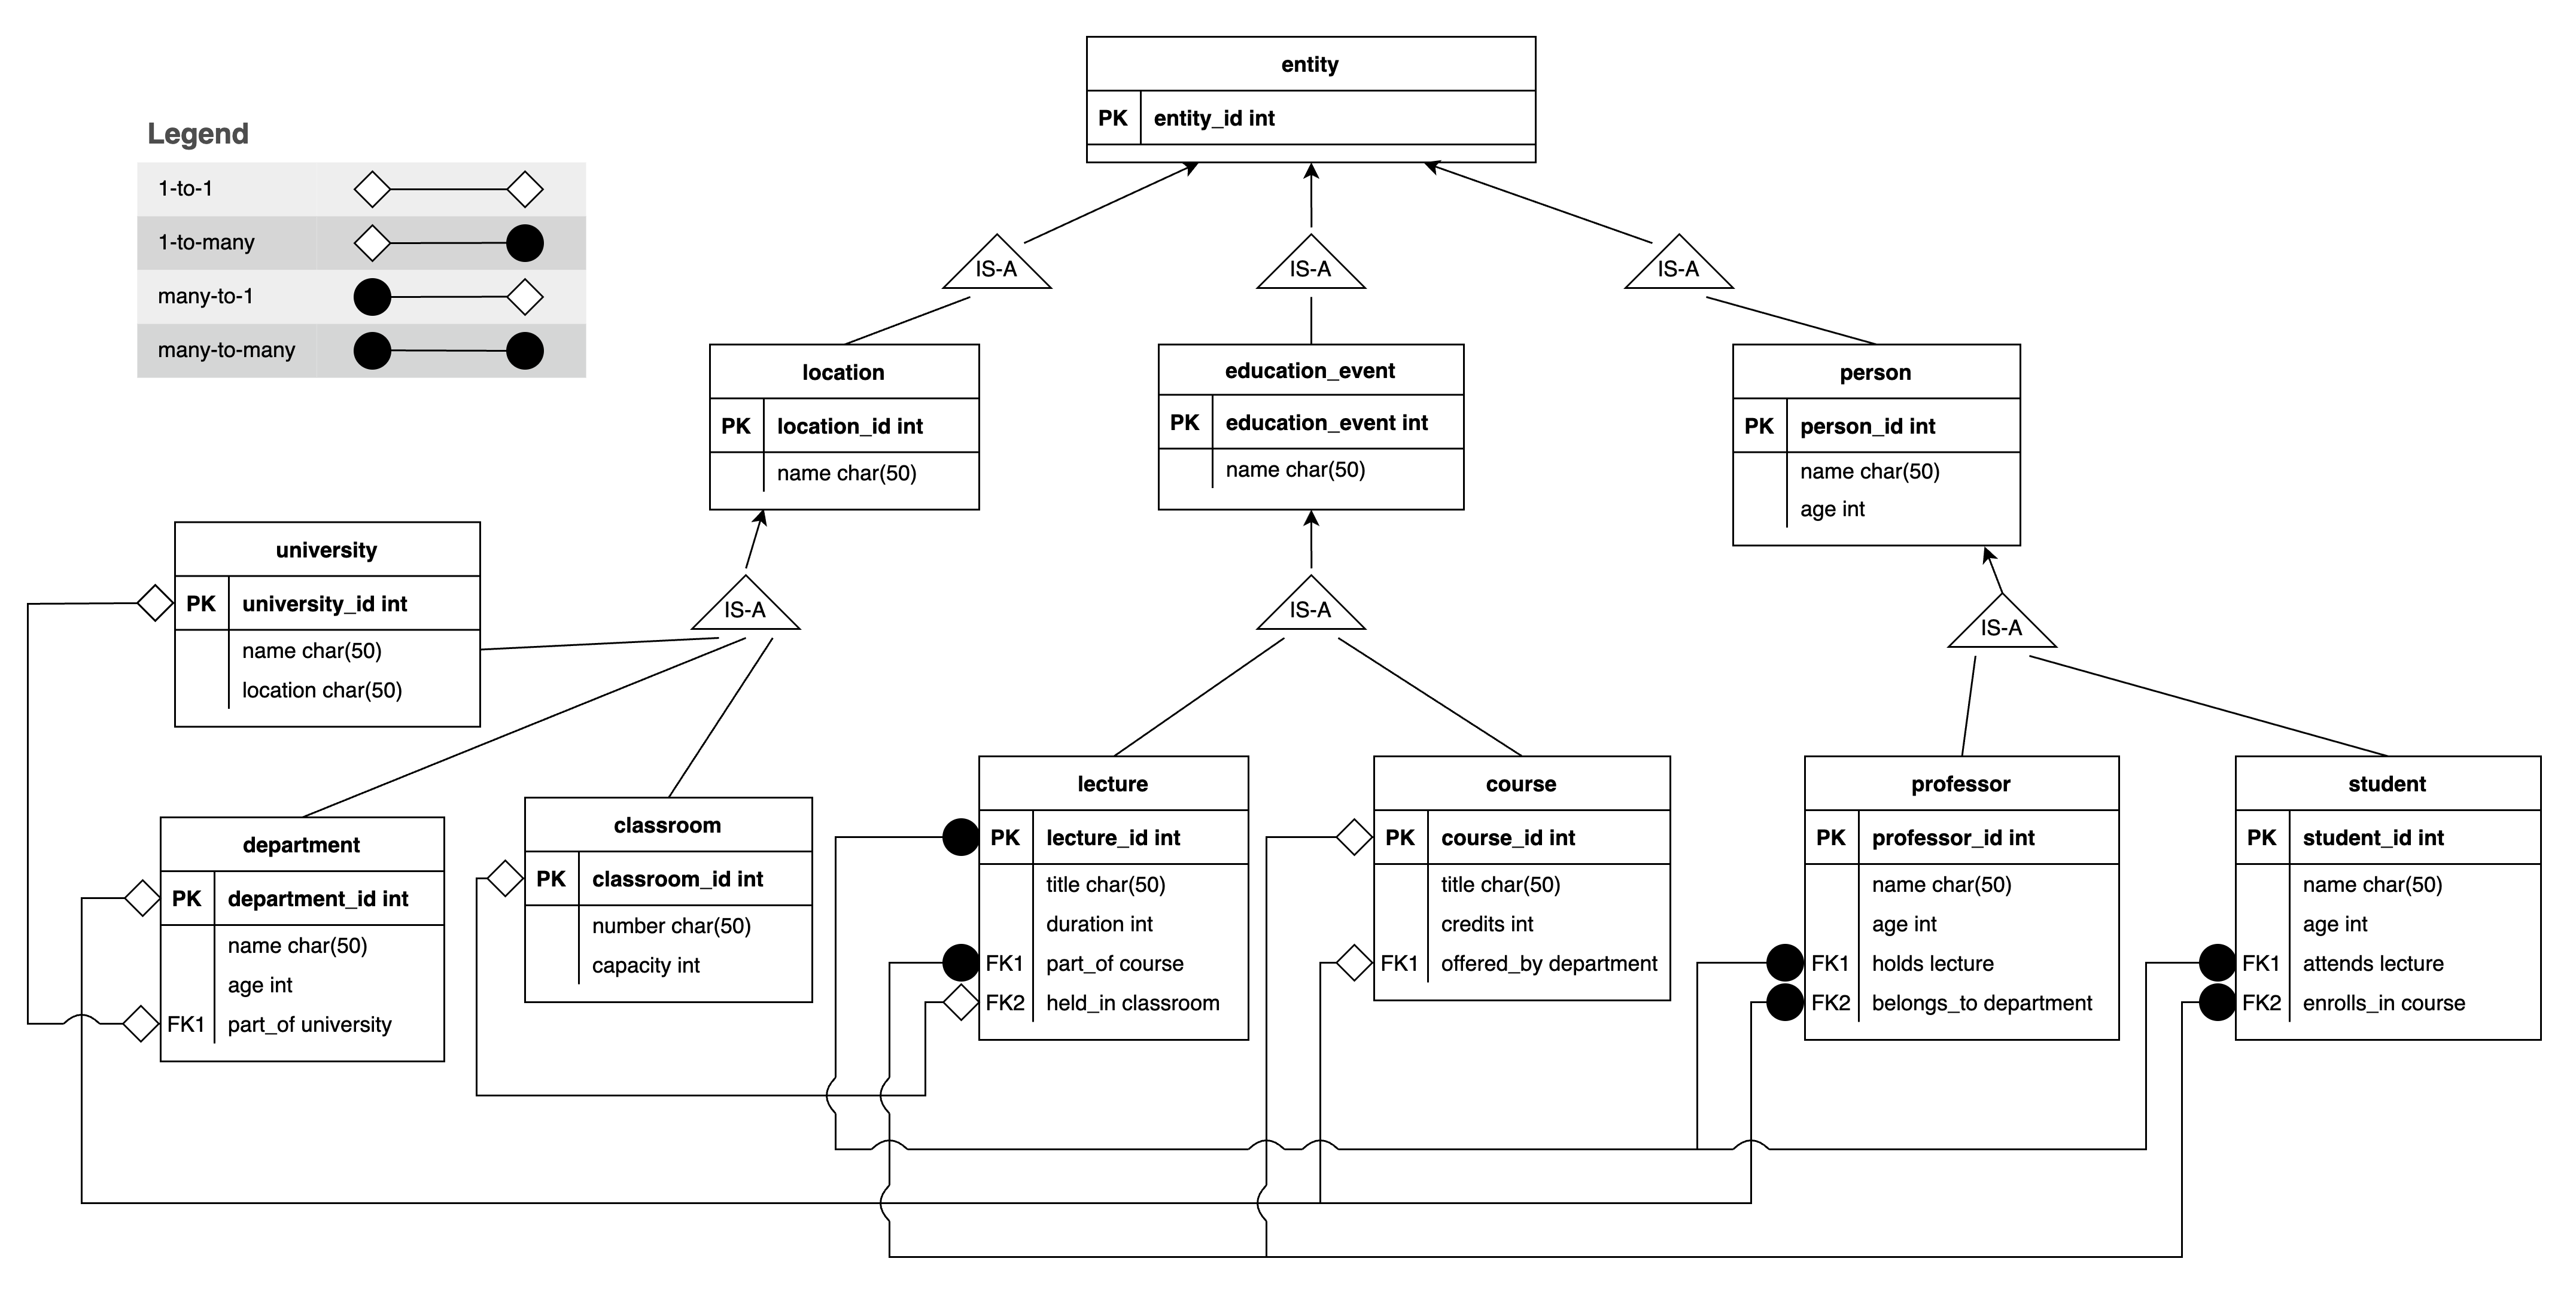

## Teleontology / ETG Knowledge Graph / ER Model

Teleontology studies the purposes and principles underlying the structure of knowledge, with a focus on events and their relationships. This section will explore two distinct perspectives through specific graphs.

The first graph represents Teleontology using the ETG (Entity Type Knowledge Graph) model. This Knowledge Graph integrates events, entities and relationships to provide a complex and interconnected semantic representation of knowledge. The ETG model is particularly useful for understanding how specific events relate to each other and to the entities involved, highlighting dynamics and interactions within a temporal and causal context.

The second graph uses the ER (Entity-Relationship) model to visualise in detail the relationships between entities and attributes within the context of the events studied by teleontology. This classical model provides a clear representation of how entities are connected through structured relationships and how attributes describe the specific characteristics of each entity. As before, the ER model will be presented immediately after the code.

In [15]:
import graphviz

def create_entity_node(graph, node):
    """
    Creates an entity node in the graph with a custom label.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
    """
    node_id = f"{node['name']}_{node['id']}"
    nodeName = node['name']
    nodeId = node['id']

    # Define labels for each type of node
    if nodeName == "professor":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int }}"
    elif nodeName == "student":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int }}"
    elif nodeName == "university":
        label = f"{{ {nodeName} | {nodeId} | name : string | location : string }}"
    elif nodeName == "lecture":
        label = f"{{ {nodeName} | {nodeId} | title : string | duration : int }}"
    elif nodeName == "department":
        label = f"{{ {nodeName} | {nodeId} | name : string | head : string }}"
    elif nodeName == "course":
        label = f"{{ {nodeName} | {nodeId} | title : string | credits : int }}"
    elif nodeName == "classroom":
        label = f"{{ {nodeName} | {nodeId} | number : string | capacity : int }}"
    elif nodeName == "research project":
        label = f"{{ {nodeName} | {nodeId} | title : string | duration : int }}"
    elif nodeName == "administrative staff":
        label = f"{{ {nodeName} | {nodeId} | name : string | age : int }}"
    else:
        label = f"{{ {nodeName} | {nodeId} }}"

    # Adding the node to the graph with the specified label
    graph.node(node_id, label, shape='record', style='rounded')

def create_relationship_graph(entities, relationships):
    """
    Creates a graph visualization with specified entities and relationships.

    Args:
        entities (list): A list of entity dictionaries.
        relationships (list): A list of relationship dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment="Complex University Relationship Graph")

    # Creating nodes for each entity
    for entity in entities:
        create_entity_node(dot, entity)

    # Creating edges for each relationship
    for rel in relationships:
        source_id = f"{rel['source']['name']}_{rel['source']['id']}"
        target_id = f"{rel['target']['name']}_{rel['target']['id']}"
        dot.edge(source_id, target_id, label=rel['label'])

    return dot

# Definition of entities
entities = [
    {"id": "25323", "name": "professor"},
    {"id": "45356", "name": "student"},
    {"id": "30127", "name": "university"},
    {"id": "48472", "name": "lecture"},
    {"id": "52830", "name": "department"},
    {"id": "19473", "name": "course"},
    {"id": "37549", "name": "classroom"},
    {"id": "65984", "name": "research project"},
    {"id": "84321", "name": "administrative staff"}
]

# Definition of relationships
relationships = [
    {"source": {"name": "student", "id": "45356"}, "target": {"name": "lecture", "id": "48472"}, "label": "attends"},
    {"source": {"name": "professor", "id": "25323"}, "target": {"name": "lecture", "id": "48472"}, "label": "holds"},
    {"source": {"name": "professor", "id": "25323"}, "target": {"name": "department", "id": "52830"}, "label": "belongs to"},
    {"source": {"name": "department", "id": "52830"}, "target": {"name": "university", "id": "30127"}, "label": "part of"},
    {"source": {"name": "course", "id": "19473"}, "target": {"name": "department", "id": "52830"}, "label": "offered by"},
    {"source": {"name": "student", "id": "45356"}, "target": {"name": "course", "id": "19473"}, "label": "enrolls in"},
    {"source": {"name": "lecture", "id": "48472"}, "target": {"name": "course", "id": "19473"}, "label": "part of"},
    {"source": {"name": "lecture", "id": "48472"}, "target": {"name": "classroom", "id": "37549"}, "label": "held in"},
    {"source": {"name": "professor", "id": "25323"}, "target": {"name": "research project", "id": "65984"}, "label": "supervises"},
    {"source": {"name": "research project", "id": "65984"}, "target": {"name": "university", "id": "30127"}, "label": "funded by"},
    {"source": {"name": "administrative staff", "id": "84321"}, "target": {"name": "department", "id": "52830"}, "label": "manages"}
]

# Create the visualization
complex_relationship_viz = create_relationship_graph(entities, relationships)

# Save the visualization as a PDF file
complex_relationship_viz.render("ETG", format="pdf", cleanup=True)
print("Complex graph visualization saved as 'ETG.pdf'")

Complex graph visualization saved as 'ETG.pdf'


Here is the ER Model related to this example:

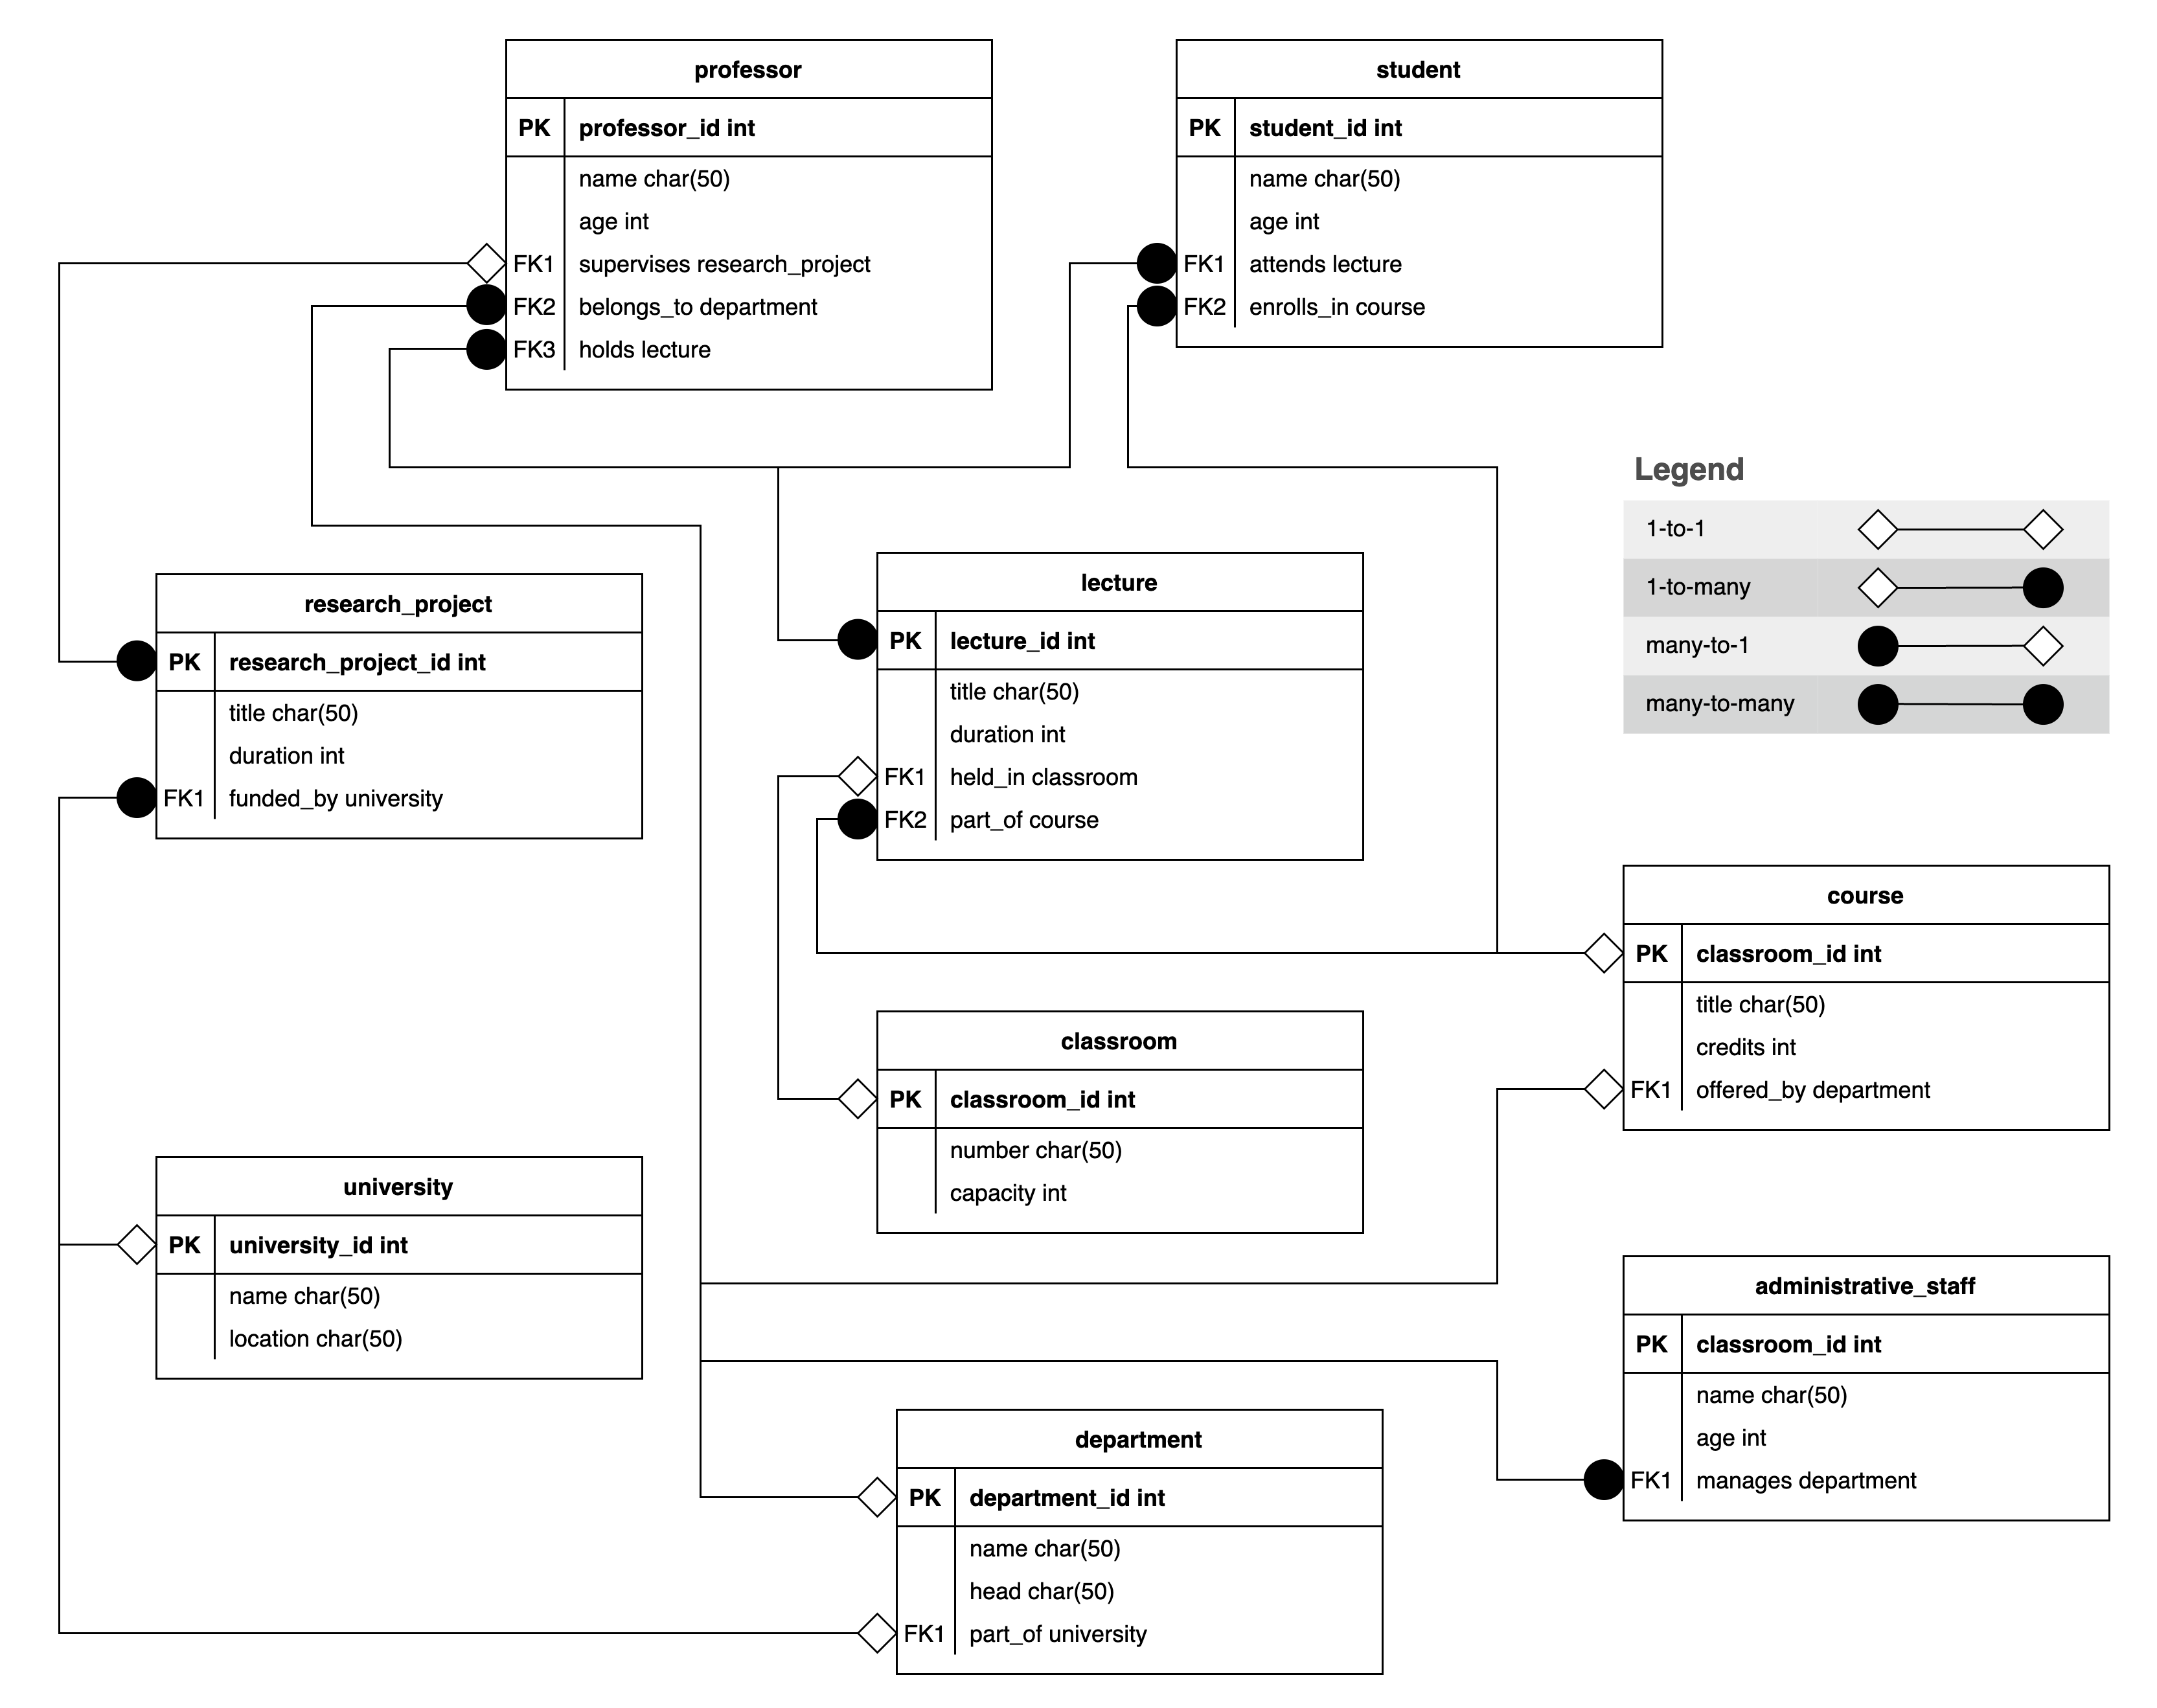

## EG Knowledge Graph / Database

This section is devoted to the EG (Entity Knowledge Graph). In this type of Knowledge Graph, the focus is on the representation of real world data. Unlike other models that might generalise entities as individual nodes, in the EG each entity is represented individually, with meaningful names for each. This means that the nodes are multiplied to reflect the complexity and diversity of the entities in the treated domain.

The EG Knowledge Graph is similar to a classical relational database, where data is entered and relationships between entities are established in a structured manner. This approach facilitates the modelling of the actual data in a format that allows efficient management and a clear understanding of the interactions between the different entities. As before, the database graph will be presented immediately after the code.

In [16]:
import graphviz

def create_entity_node(graph, node):
    """
    Creates an entity node in the graph with a custom label.

    Args:
        graph (graphviz.Digraph): The Graphviz Digraph object.
        node (dict): The current node represented as a dictionary with 'name' and 'id' keys.
    """
    node_id = f"{node['name']}_{node['id']}"
    nodeName = node['name']
    nodeId = node['id']

    # Define labels for each type of node
    if nodeName == "professor":
        label = f"{{ {nodeName} | {nodeId} | name : {node['attributes']['name']} | age : {node['attributes']['age']} }}"
    elif nodeName == "student":
        label = f"{{ {nodeName} | {nodeId} | name : {node['attributes']['name']} | age : {node['attributes']['age']} }}"
    elif nodeName == "university":
        label = f"{{ {nodeName} | {nodeId} | name : {node['attributes']['name']} | location : {node['attributes']['location']} }}"
    elif nodeName == "lecture":
        label = f"{{ {nodeName} | {nodeId} | title : {node['attributes']['title']} | duration : {node['attributes']['duration']} }}"
    elif nodeName == "department":
        label = f"{{ {nodeName} | {nodeId} | name : {node['attributes']['name']} | head : {node['attributes']['head']} }}"
    elif nodeName == "course":
        label = f"{{ {nodeName} | {nodeId} | title : {node['attributes']['title']} | credits : {node['attributes']['credits']} }}"
    elif nodeName == "classroom":
        label = f"{{ {nodeName} | {nodeId} | number : {node['attributes']['number']} | capacity : {node['attributes']['capacity']} }}"
    elif nodeName == "research project":
        label = f"{{ {nodeName} | {nodeId} | title : {node['attributes']['title']} | duration : {node['attributes']['duration']} }}"
    elif nodeName == "administrative staff":
        label = f"{{ {nodeName} | {nodeId} | name : {node['attributes']['name']} | age : {node['attributes']['age']} }}"
    else:
        label = f"{{ {nodeName} | {nodeId} }}"

    # Adding the node to the graph with the specified label
    graph.node(node_id, label, shape='record', style='rounded')

def create_relationship_graph(entities, relationships):
    """
    Creates a graph visualization with specified entities and relationships.

    Args:
        entities (list): A list of entity dictionaries.
        relationships (list): A list of relationship dictionaries.

    Returns:
        graphviz.Digraph: The resulting Graphviz Digraph object.
    """
    dot = graphviz.Digraph(comment="Complex University Relationship Graph")

    # Creating nodes for each entity
    for entity in entities:
        create_entity_node(dot, entity)

    # Creating edges for each relationship
    for rel in relationships:
        source_id = f"{rel['source']['name']}_{rel['source']['id']}"
        target_id = f"{rel['target']['name']}_{rel['target']['id']}"
        dot.edge(source_id, target_id, label=rel['label'])

    return dot

# Definition of entities with populated data
entities = [
    {"id": "25323", "name": "professor", "attributes": {"name": "Fausto", "age": "50", "department": "DISI"}},
    {"id": "25324", "name": "professor", "attributes": {"name": "Vincenzo", "age": "35", "department": "DISI"}},
    {"id": "45356", "name": "student", "attributes": {"name": "Marco", "age": "22", "course": "Computer Science"}},
    {"id": "45357", "name": "student", "attributes": {"name": "Luca", "age": "21", "course": "Computer Science"}},
    {"id": "30127", "name": "university", "attributes": {"name": "Università di Trento", "location": "Trento"}},
    {"id": "48472", "name": "lecture", "attributes": {"title": "Advanced Programming", "duration": "90"}},
    {"id": "48473", "name": "lecture", "attributes": {"title": "Computational Logic", "duration": "120"}},
    {"id": "52830", "name": "department", "attributes": {"name": "DISI", "head": "Prof. Mario"}},
    {"id": "19473", "name": "course", "attributes": {"title": "Computer Science", "credits": "180"}},
    {"id": "37549", "name": "classroom", "attributes": {"number": "A202", "capacity": "100"}},
    {"id": "37550", "name": "classroom", "attributes": {"number": "B107", "capacity": "80"}},
    {"id": "65984", "name": "research project", "attributes": {"title": "AI Research", "duration": "24"}},
    {"id": "95844", "name": "research project", "attributes": {"title": "Logic Modelling", "duration": "60"}},
    {"id": "84321", "name": "administrative staff", "attributes": {"name": "Giovanna", "age": "38"}}
]

# Definition of relationships
relationships = [
    {"source": {"name": "student", "id": "45356"}, "target": {"name": "lecture", "id": "48472"}, "label": "attends"},
    {"source": {"name": "student", "id": "45357"}, "target": {"name": "lecture", "id": "48473"}, "label": "attends"},
    {"source": {"name": "professor", "id": "25323"}, "target": {"name": "lecture", "id": "48472"}, "label": "holds"},
    {"source": {"name": "professor", "id": "25324"}, "target": {"name": "lecture", "id": "48473"}, "label": "holds"},
    {"source": {"name": "professor", "id": "25323"}, "target": {"name": "department", "id": "52830"}, "label": "belongs to"},
    {"source": {"name": "professor", "id": "25324"}, "target": {"name": "department", "id": "52830"}, "label": "belongs to"},
    {"source": {"name": "department", "id": "52830"}, "target": {"name": "university", "id": "30127"}, "label": "part of"},
    {"source": {"name": "course", "id": "19473"}, "target": {"name": "department", "id": "52830"}, "label": "offered by"},
    {"source": {"name": "student", "id": "45356"}, "target": {"name": "course", "id": "19473"}, "label": "enrolls in"},
    {"source": {"name": "student", "id": "45357"}, "target": {"name": "course", "id": "19473"}, "label": "enrolls in"},
    {"source": {"name": "lecture", "id": "48472"}, "target": {"name": "course", "id": "19473"}, "label": "part of"},
    {"source": {"name": "lecture", "id": "48473"}, "target": {"name": "course", "id": "19473"}, "label": "part of"},
    {"source": {"name": "lecture", "id": "48472"}, "target": {"name": "classroom", "id": "37550"}, "label": "held in"},
    {"source": {"name": "lecture", "id": "48473"}, "target": {"name": "classroom", "id": "37549"}, "label": "held in"},
    {"source": {"name": "professor", "id": "25323"}, "target": {"name": "research project", "id": "65984"}, "label": "supervises"},
    {"source": {"name": "professor", "id": "25324"}, "target": {"name": "research project", "id": "95844"}, "label": "supervises"},
    {"source": {"name": "research project", "id": "65984"}, "target": {"name": "university", "id": "30127"}, "label": "funded by"},
    {"source": {"name": "research project", "id": "95844"}, "target": {"name": "university", "id": "30127"}, "label": "funded by"},
    {"source": {"name": "administrative staff", "id": "84321"}, "target": {"name": "department", "id": "52830"}, "label": "manages"}
]

# Create the visualization
complex_relationship_viz = create_relationship_graph(entities, relationships)

# Save the visualization as a PDF file
complex_relationship_viz.render("EG", format="pdf", cleanup=True)
print("Complex graph visualization saved as 'EG.pdf'")

Complex graph visualization saved as 'EG.pdf'


Here is the Database related to this example:

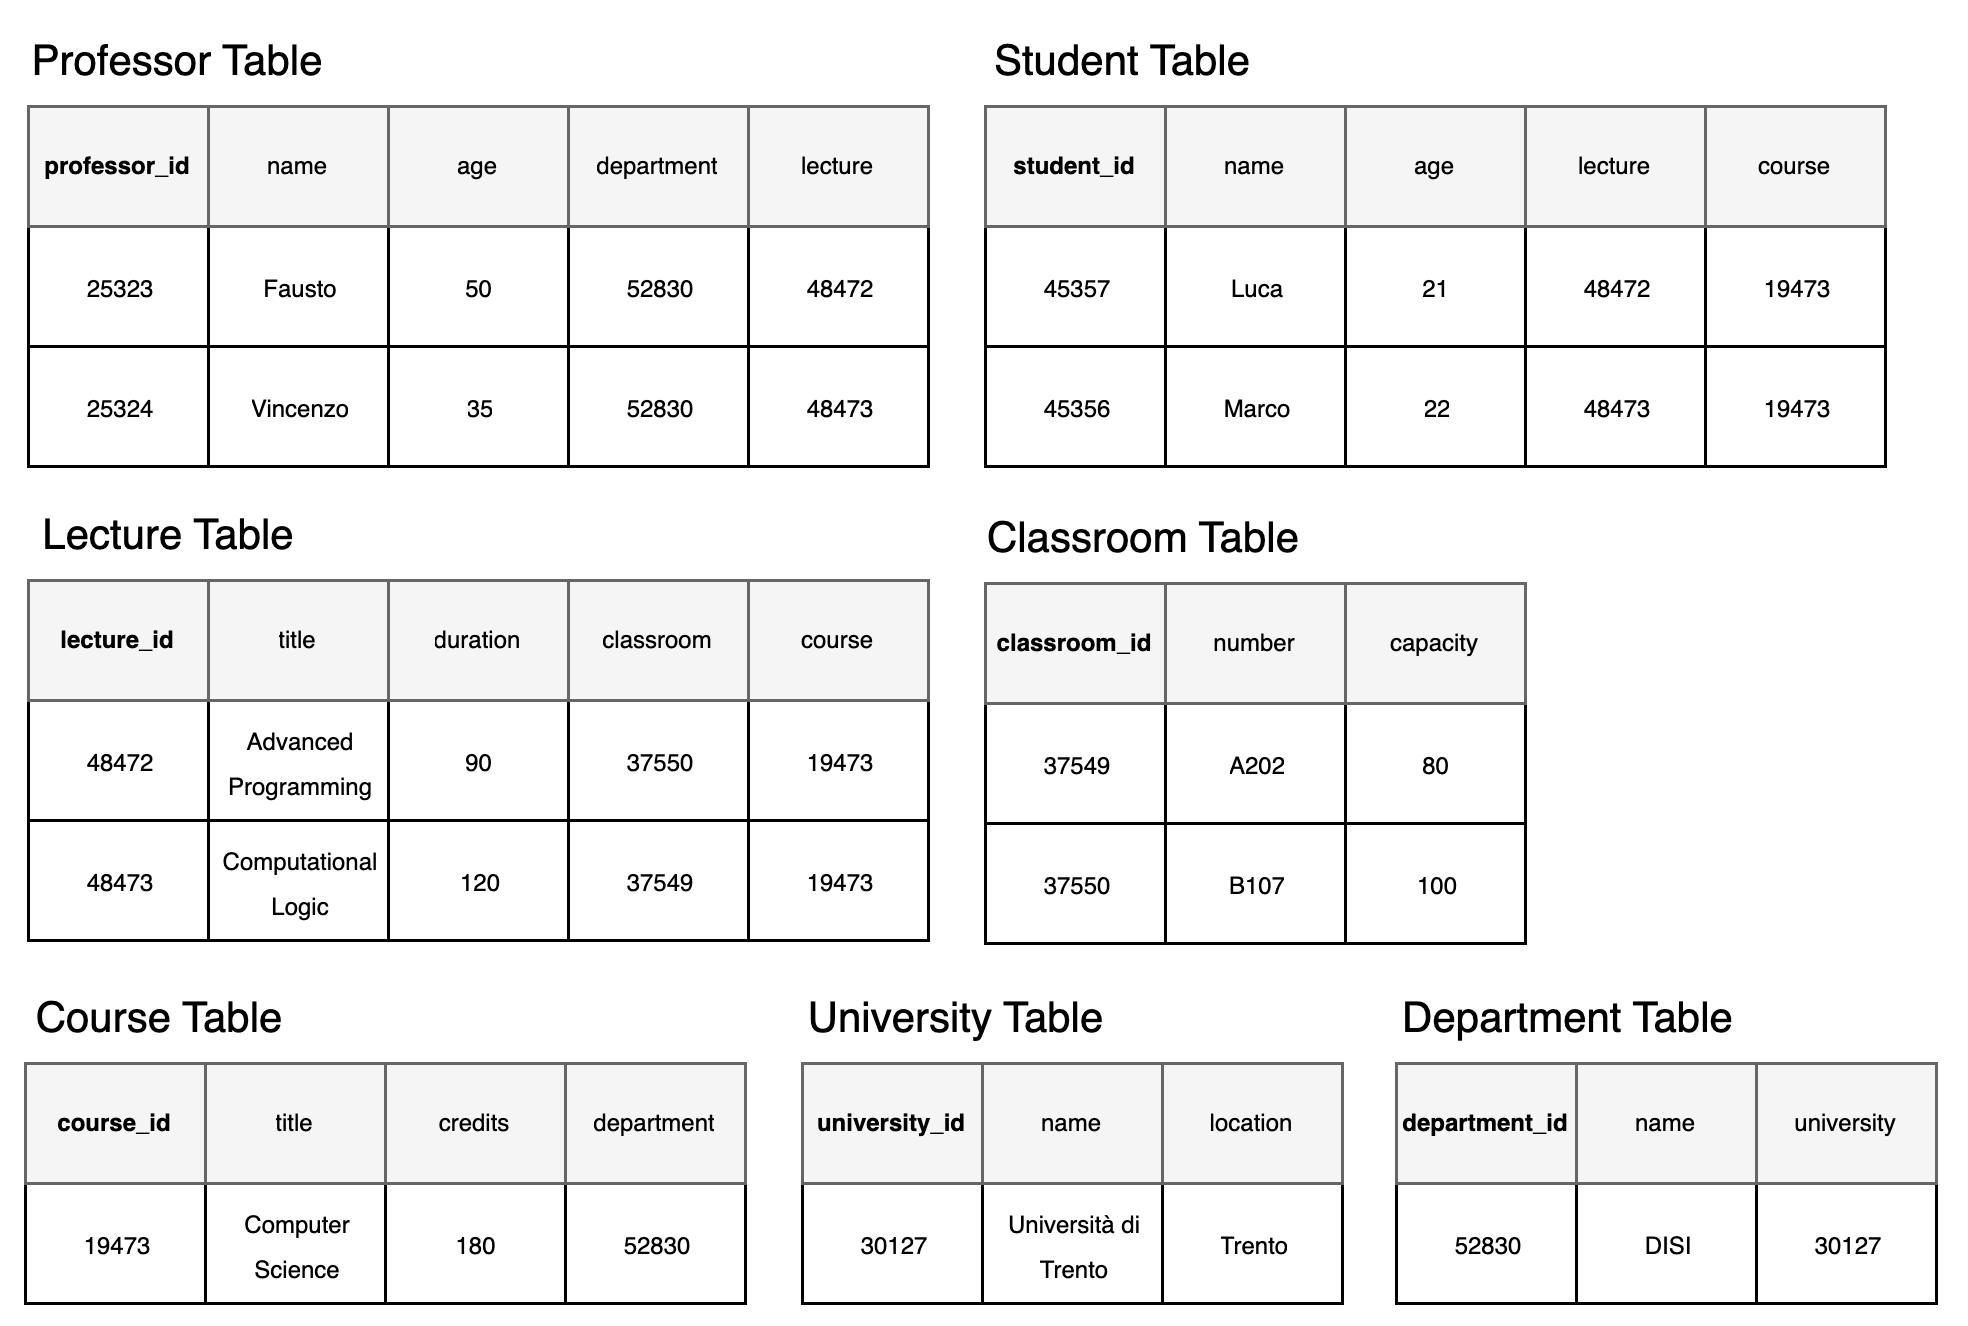

## Conclusions

This Jupyter Notebook has explored different methodologies and models for formal knowledge modelling, using various types of Knowledge Graphs and teleology approaches.

- **WordNet:** It has provided a fundamental basis for understanding semantic relationships between linguistic concepts, facilitating disambiguation of word meanings and supporting applications in natural language processing.

- **UKC (Universal Knowledge Core):** It has evolved beyond WordNet by integrating a wide range of languages and concepts through a multilingual approach and a semantic network, making knowledge more accessible and usable on a global scale.

- **Language Teleology:** Explored teleology in the linguistic context, studying the inherent purposes and goals in the structure of language, highlighting how languages evolve to meet specific communicative needs.

- **Knowledge Teleology:** Detailed modelling of entities, relationships and attributes to represent complex knowledge domains, facilitating access and analysis of structured information.

- **Teleontology / ETG Knowledge Graph:** The ETG model highlighted the importance of representing events and their relationships in an interconnected semantic context.

- **EG Knowledge Graph:** Explored the Knowledge Graph of entities, similar to a relational database, to represent real data and structured relationships between entities, providing a detailed and visually explanatory understanding of data management.

### Importance of Knowledge Graphs

Knowledge Graphs, such as EGs and ETGs, represent a significant evolutionary step in structured knowledge modelling. They offer:

- **Semantic interconnectedness:** They enable the representation of complex relationships between concepts and entities, enhancing the understanding of real-world dynamics and interactions.

- **Scalability and flexibility:** They can integrate a wide range of data and concepts, adapting to the specific needs of different applications and contexts.

- **Clarity and understanding:** They provide a visual and intuitive representation of data relationships, facilitating the interpretation and analysis of complex information.

In conclusion, the use of Knowledge Graphs such as EGs and ETGs not only improves our ability to represent knowledge in more sophisticated and complex ways, but also to take advantage of this representation to improve applications in various domains, from natural language processing to data management and artificial intelligence.